In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney-disease-dataset/kidney_disease_dataset.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/kidney-disease-dataset/kidney_disease_dataset.csv')
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine                            20538 non-null  object 
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [4]:
df.describe(include='all')

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538,20538,20538,20538,20538.000000,...,20538,20538.000000,20538,20538.000000,20538.000000,20538.000000,20538,20538.000000,20538.000000,20538
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,2,NaN,3,NaN,NaN,NaN,2,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,normal,abnormal,present,not present,NaN,...,no,NaN,low,NaN,NaN,NaN,abnormal,NaN,NaN,No_Disease
freq,NaN,NaN,NaN,NaN,NaN,10272,10274,10298,10353,NaN,...,10293,NaN,6869,NaN,NaN,NaN,10302,NaN,NaN,16432
mean,47.477895,130.352079,1.015041,2.501266,2.494595,NaN,NaN,NaN,NaN,284.630295,...,NaN,27.544240,NaN,14.918152,14.946879,1.749459,NaN,5.061633,7.702504,NaN
std,24.941947,29.063838,0.005793,1.697084,1.701059,NaN,NaN,NaN,NaN,124.633265,...,NaN,7.221082,NaN,8.963722,8.945500,0.718980,NaN,2.853217,4.191765,NaN
min,5.000000,80.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,70.000000,...,NaN,15.000000,NaN,0.000000,0.000000,0.500000,NaN,0.100000,0.500000,NaN
25%,26.000000,105.000000,1.010000,1.000000,1.000000,NaN,NaN,NaN,NaN,176.000000,...,NaN,21.300000,NaN,7.000000,7.000000,1.130000,NaN,2.600000,4.050000,NaN
50%,47.000000,131.000000,1.015000,3.000000,2.000000,NaN,NaN,NaN,NaN,284.500000,...,NaN,27.600000,NaN,15.000000,15.000000,1.750000,NaN,5.070000,7.710000,NaN
75%,69.000000,156.000000,1.020000,4.000000,4.000000,NaN,NaN,NaN,NaN,393.000000,...,NaN,33.800000,NaN,23.000000,23.000000,2.370000,NaN,7.537500,11.297500,NaN


In [5]:
df.isna().sum()

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

# Vizualtization Section

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cols = ['Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family history of chronic kidney disease',
       'Smoking status', 'Body Mass Index (BMI)', 'Physical activity level',
       'Duration of diabetes mellitus (years)',
       'Duration of hypertension (years)', 'Cystatin C level',
       'Urinary sediment microscopy results', 'C-reactive protein (CRP) level',
       'Interleukin-6 (IL-6) level', 'Target']

# 'Blood urea (mg/dl)',

# Count Plot

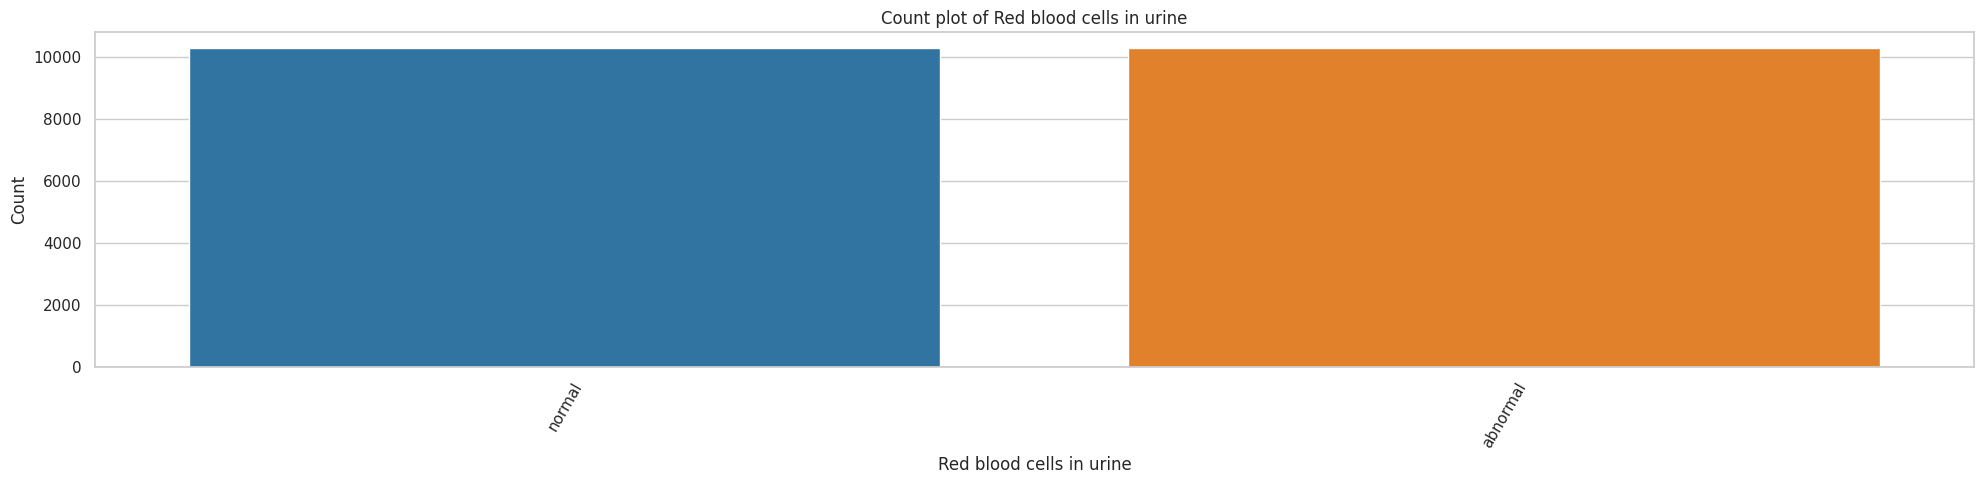

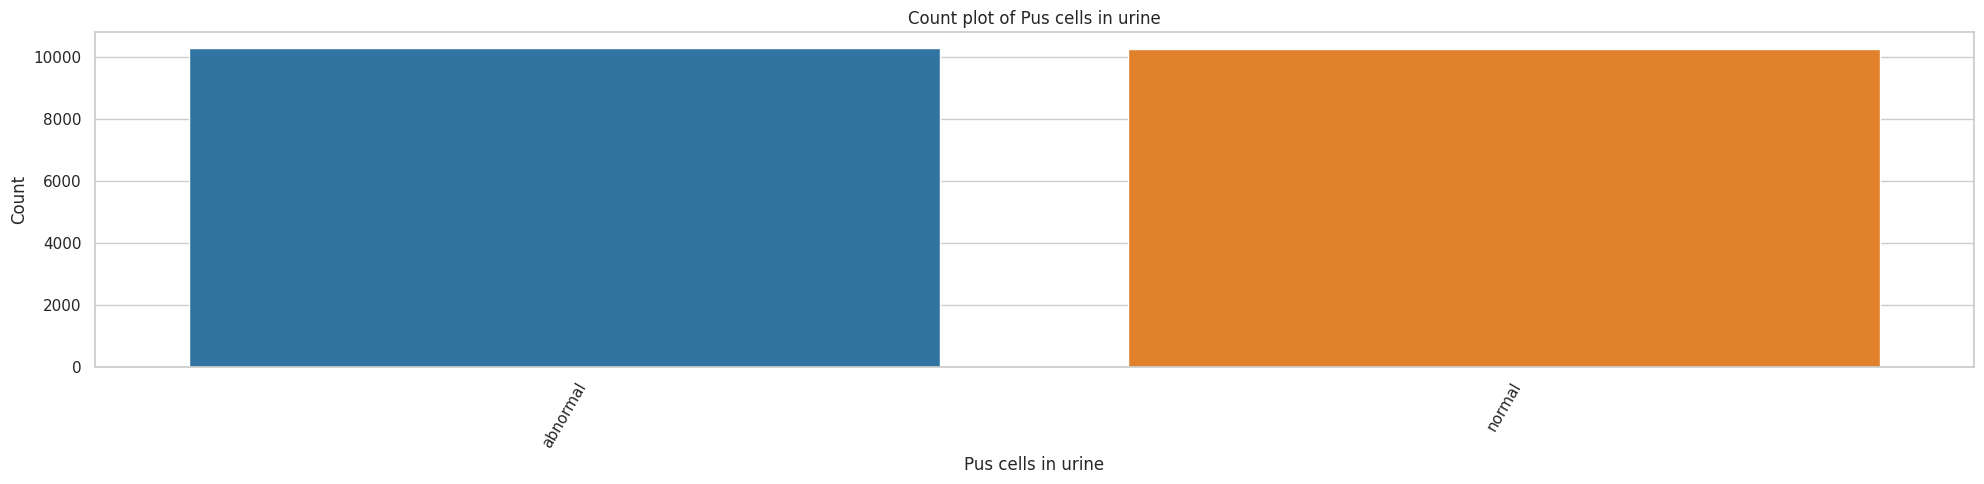

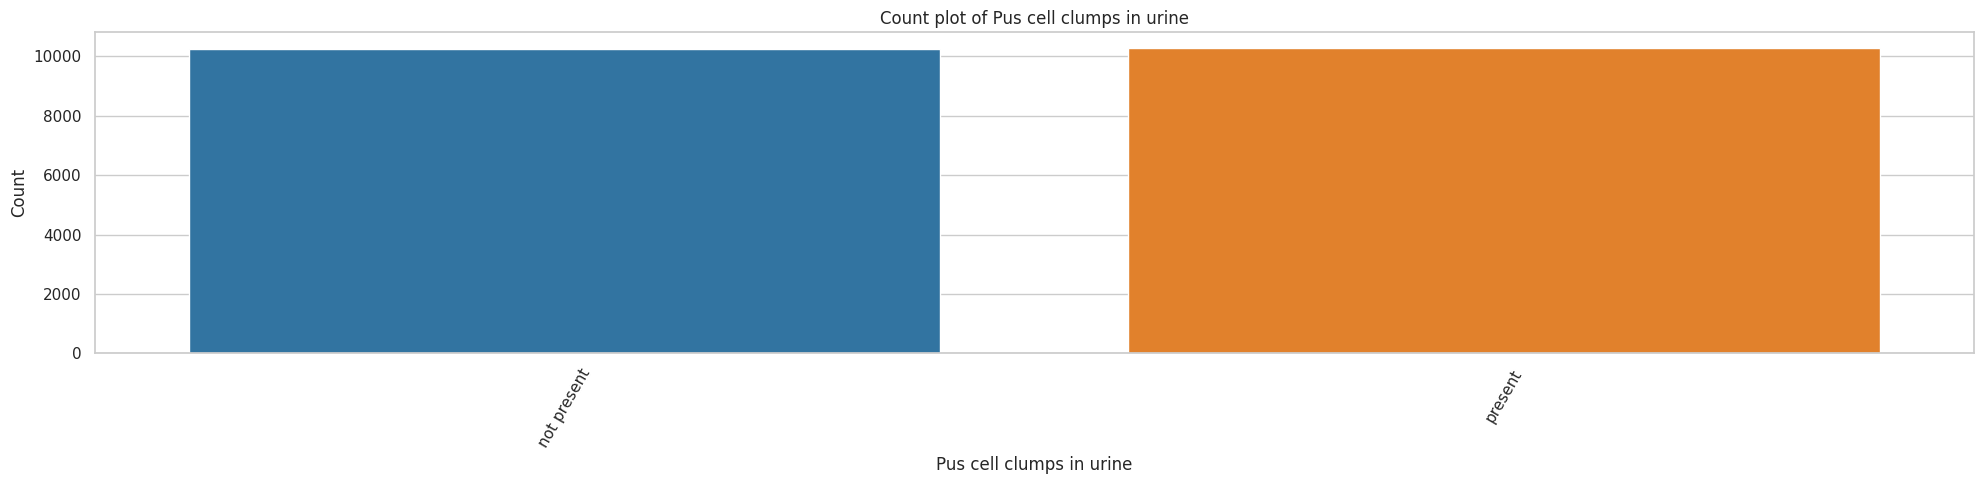

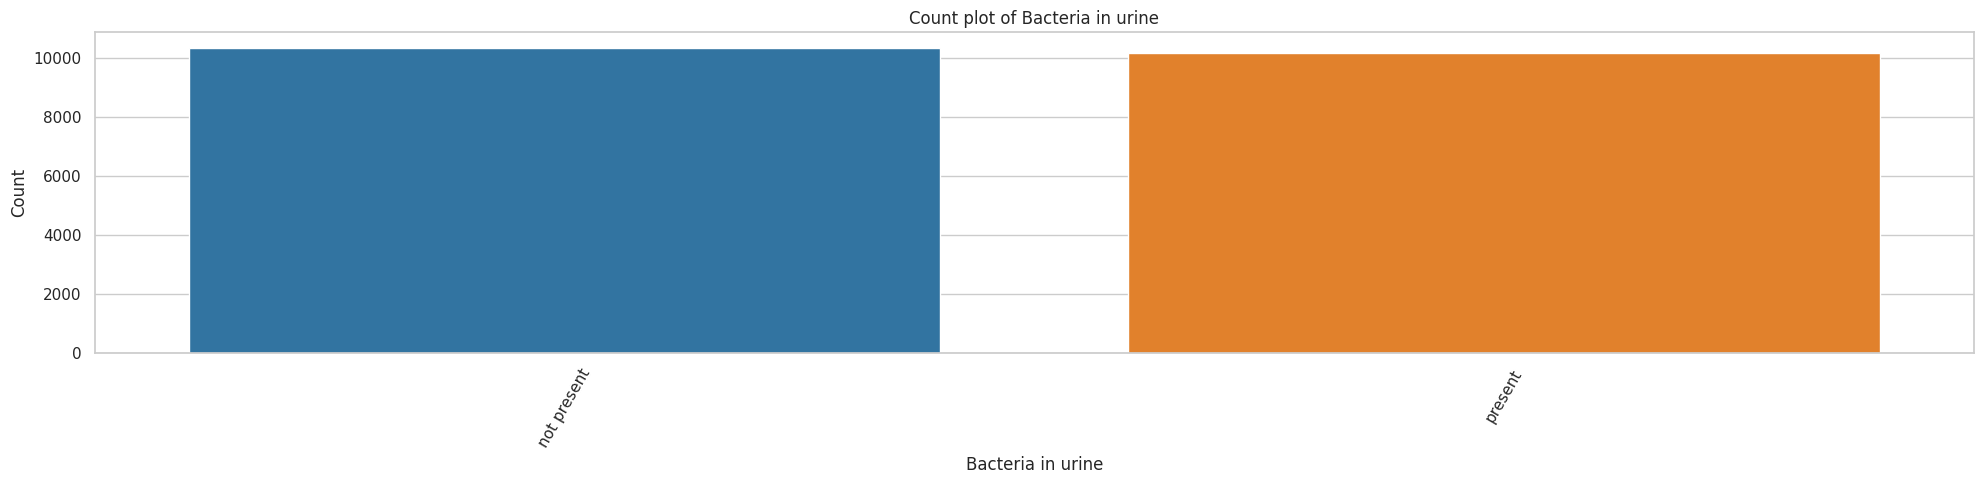

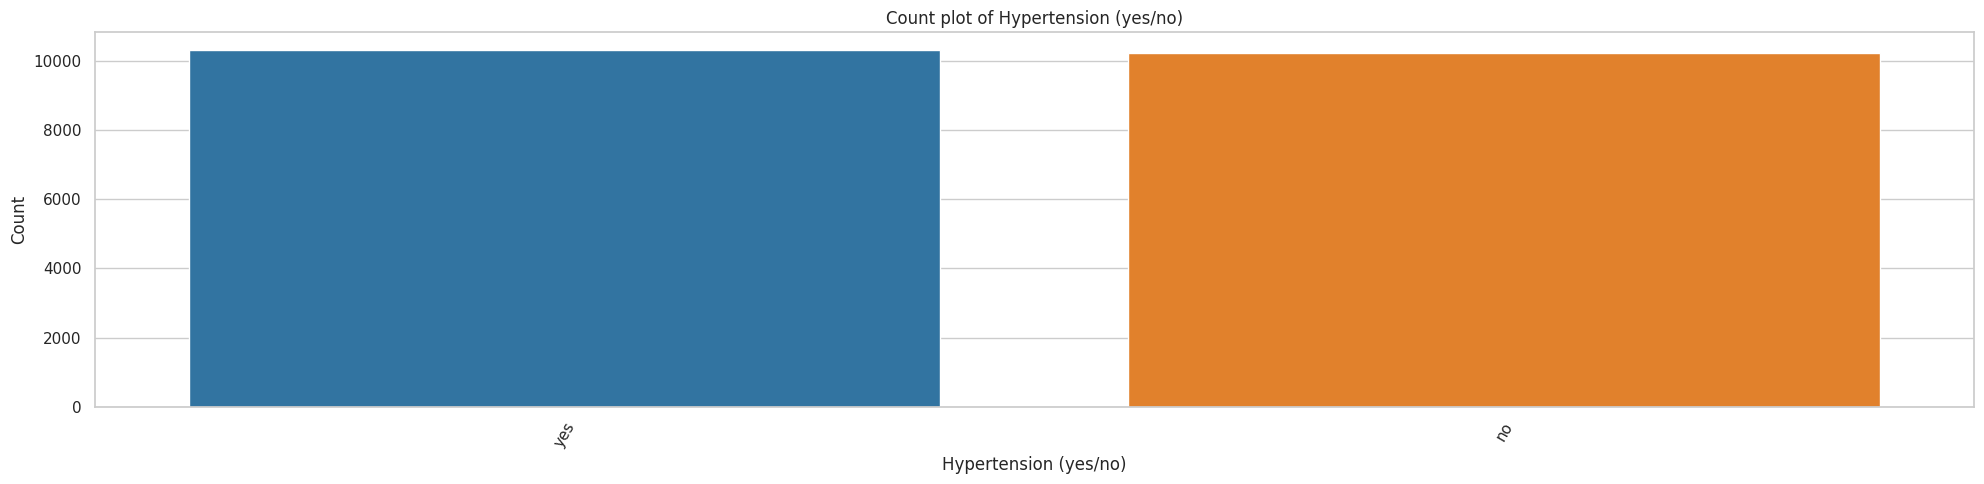

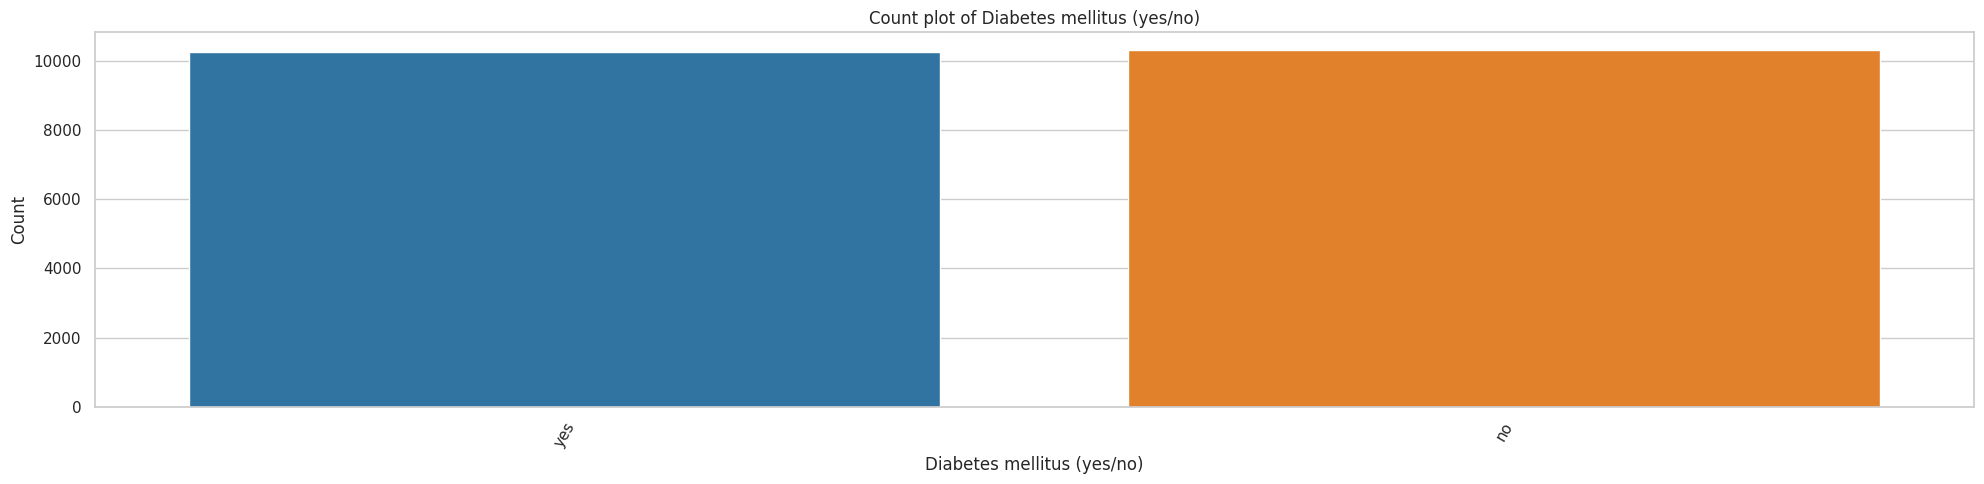

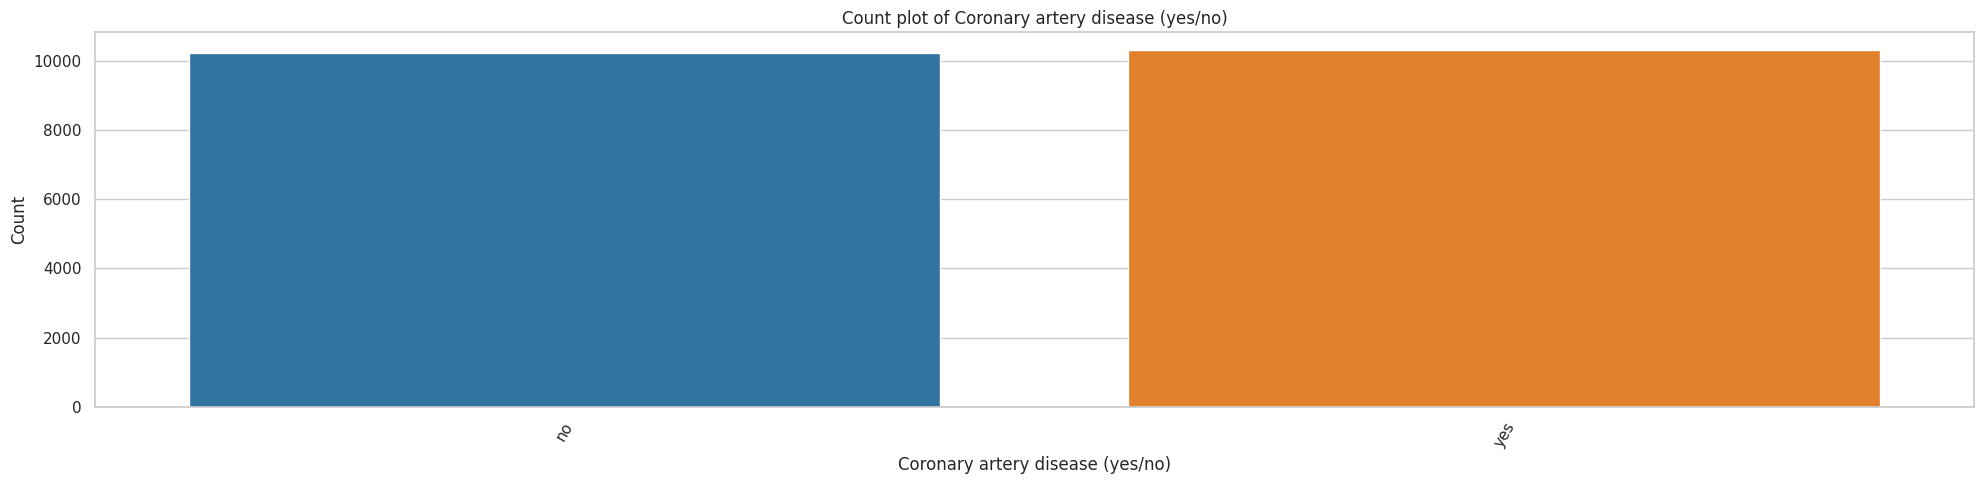

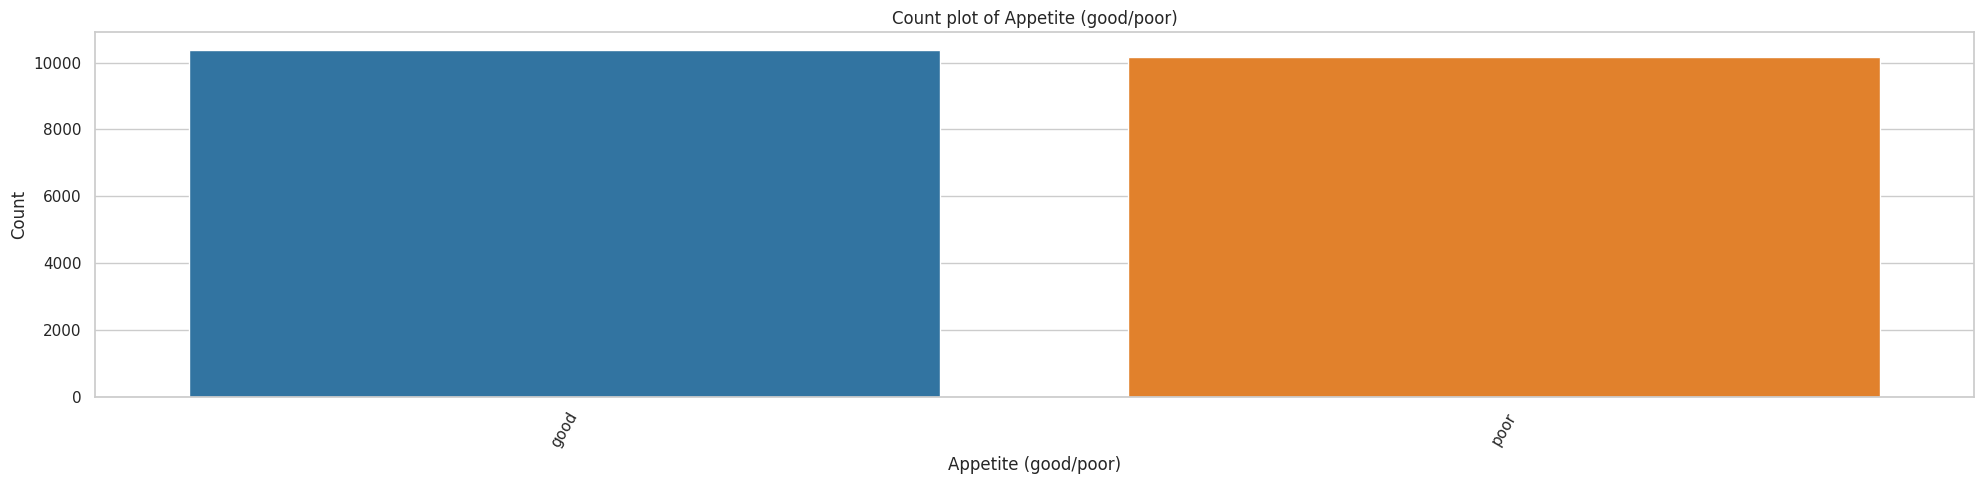

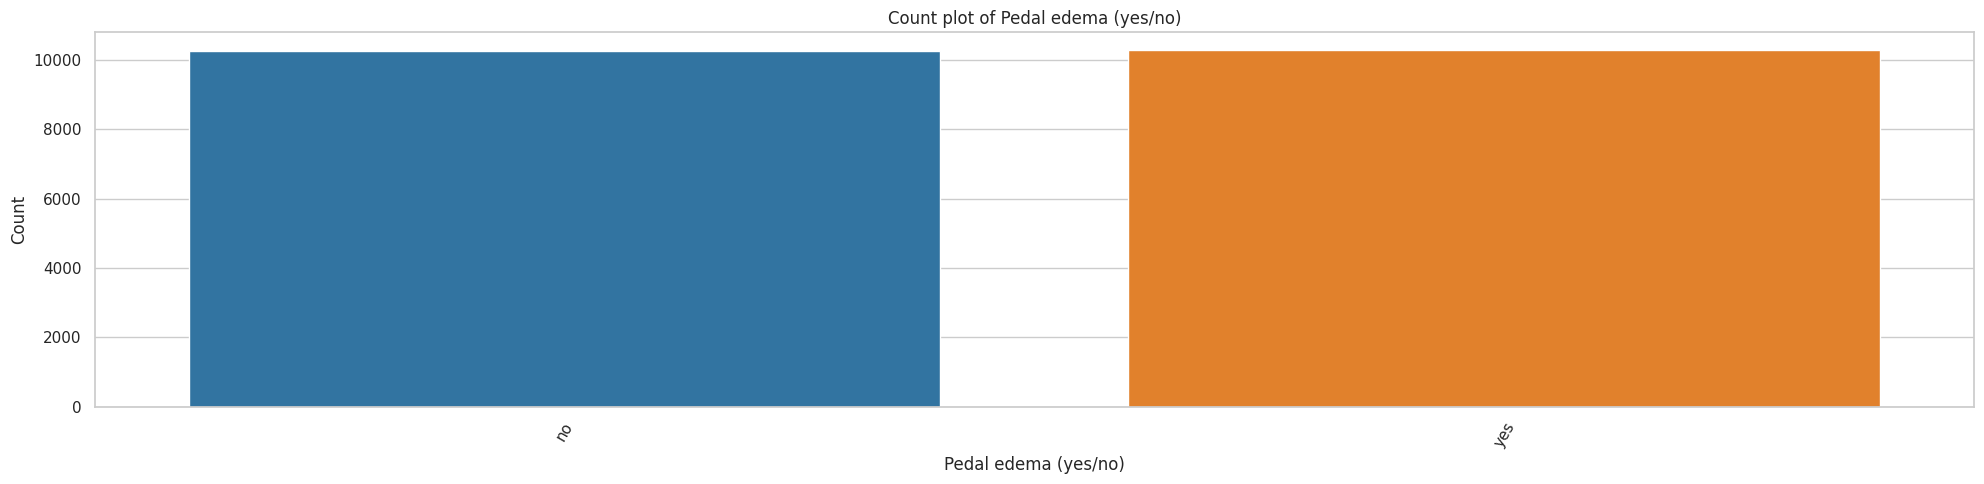

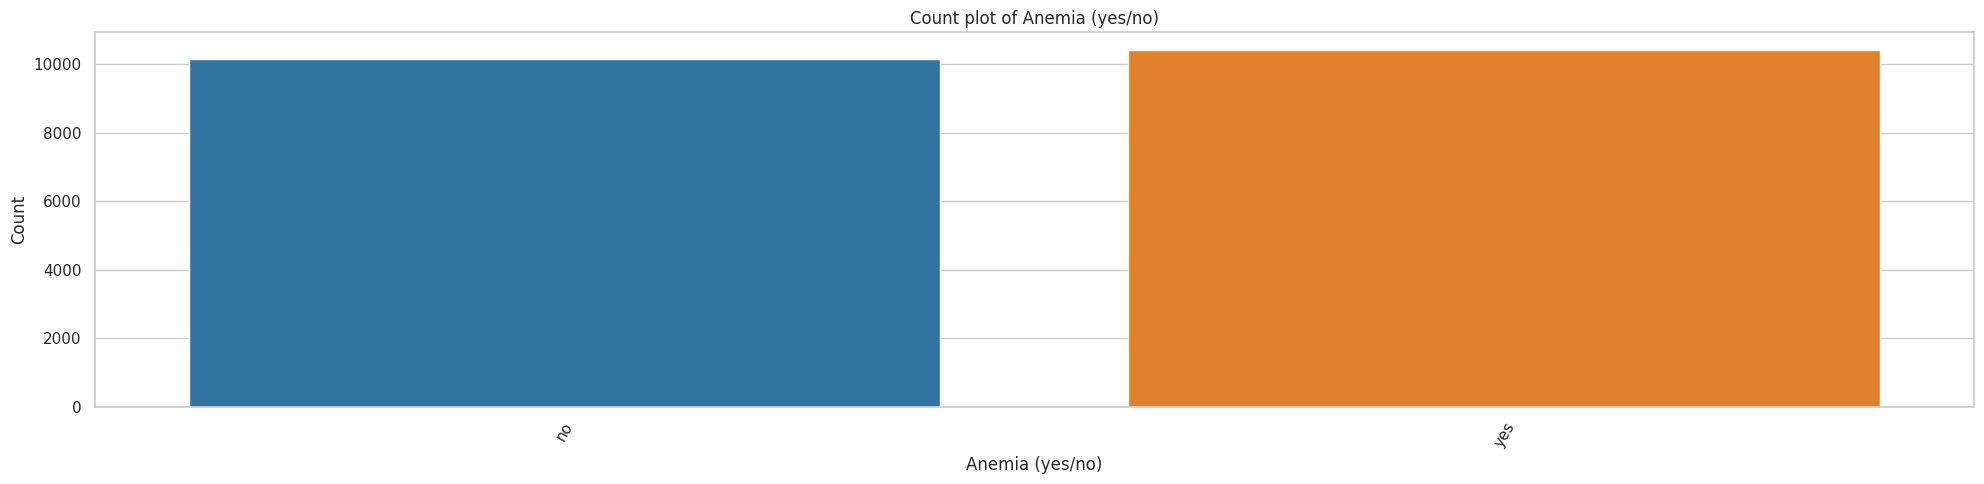

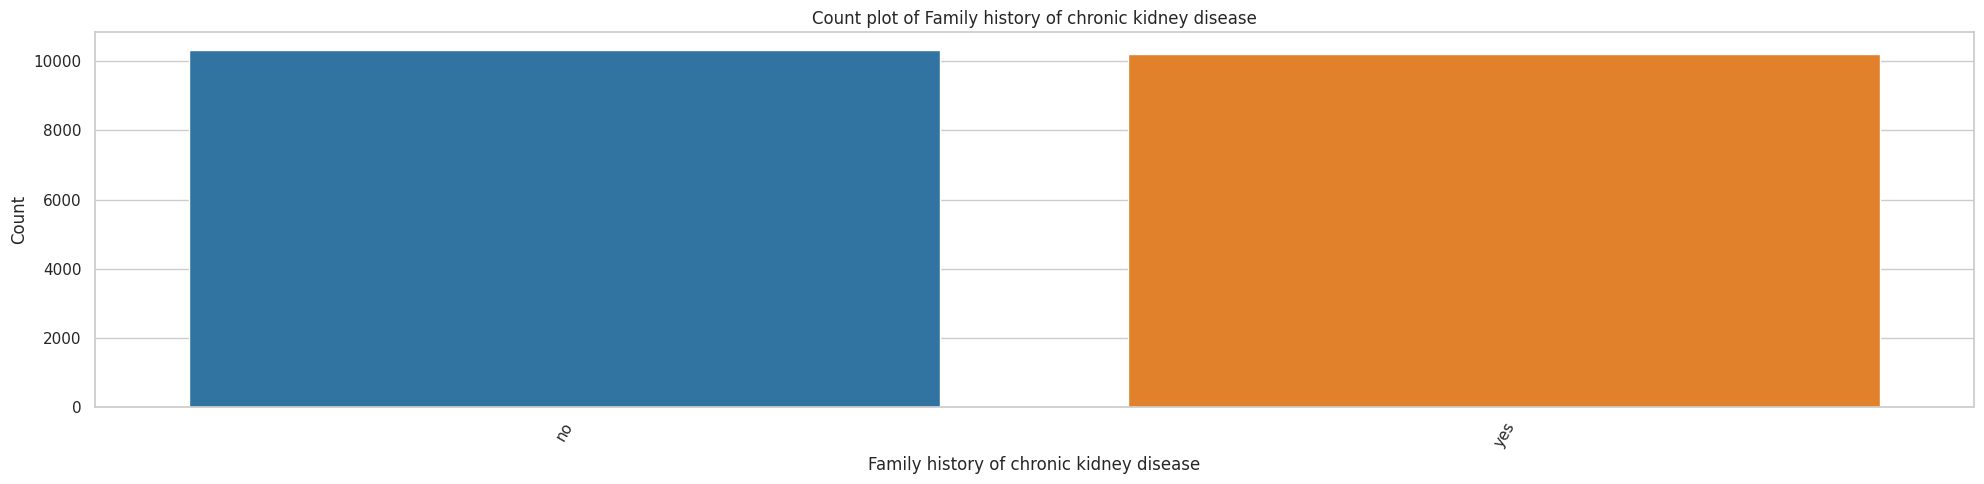

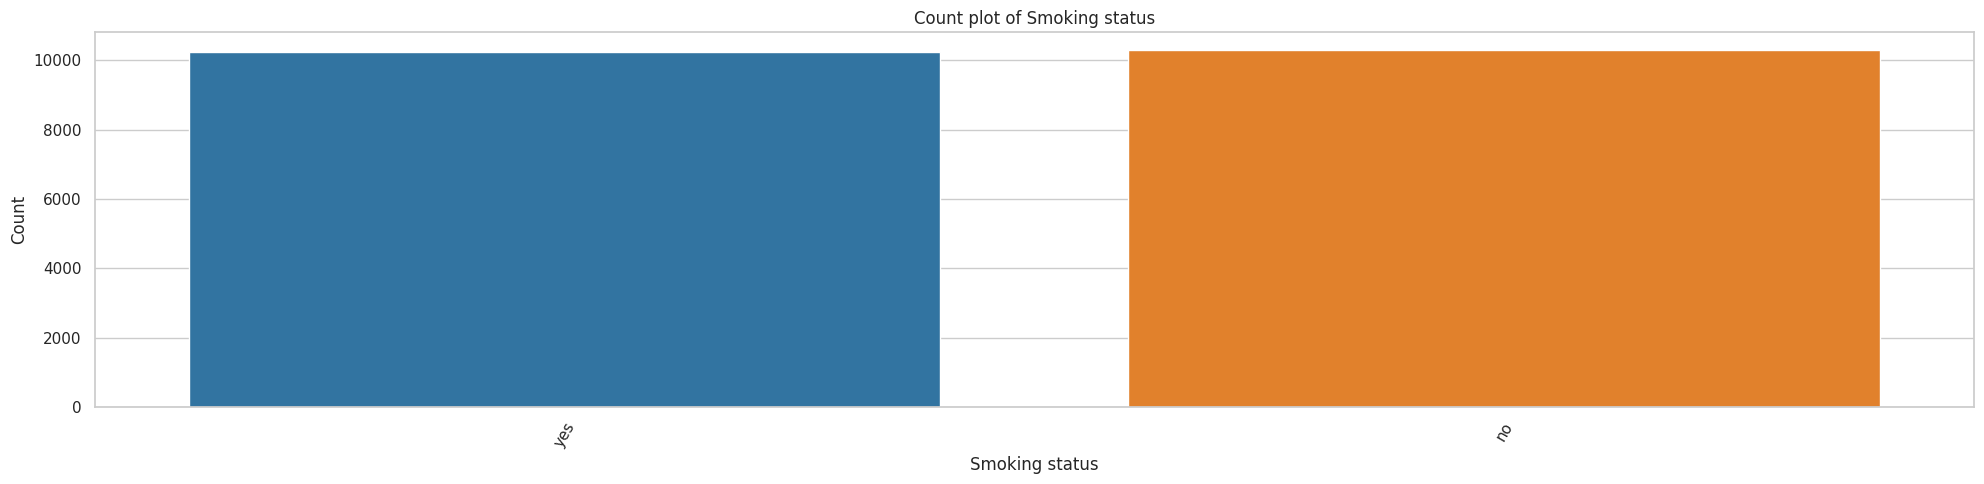

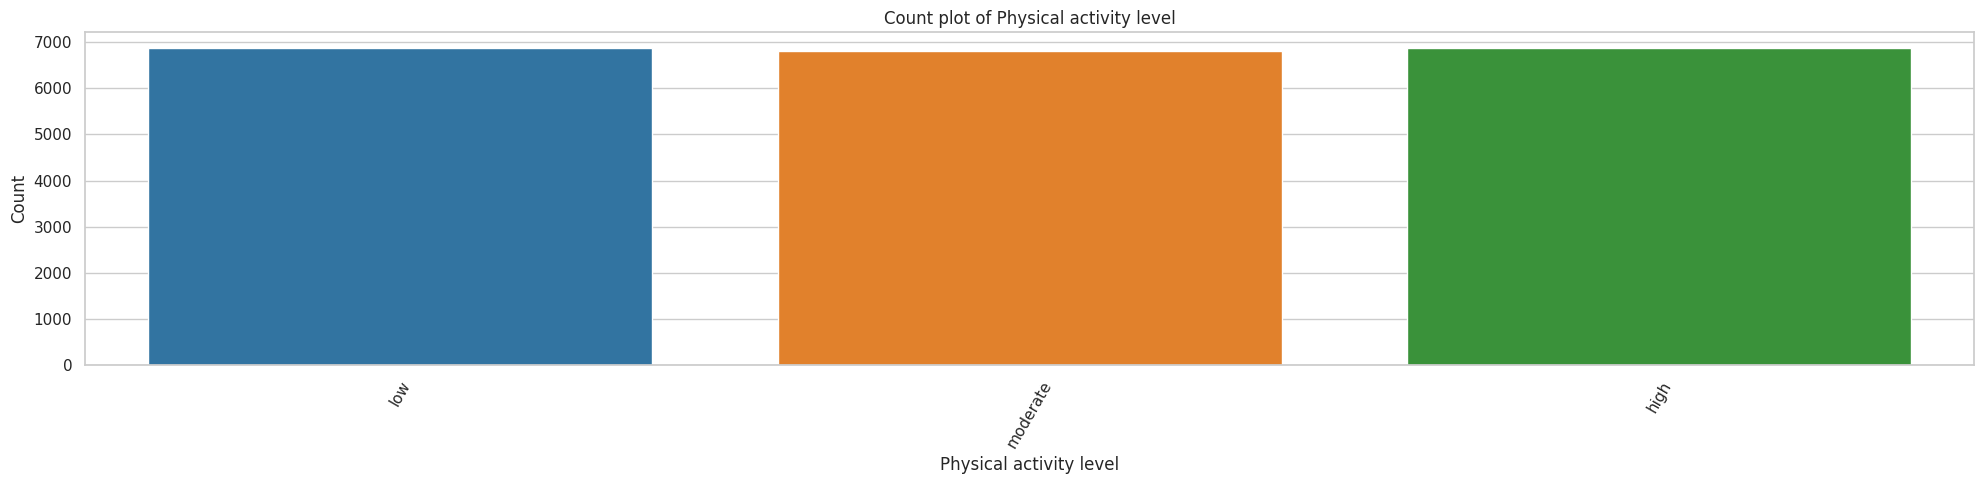

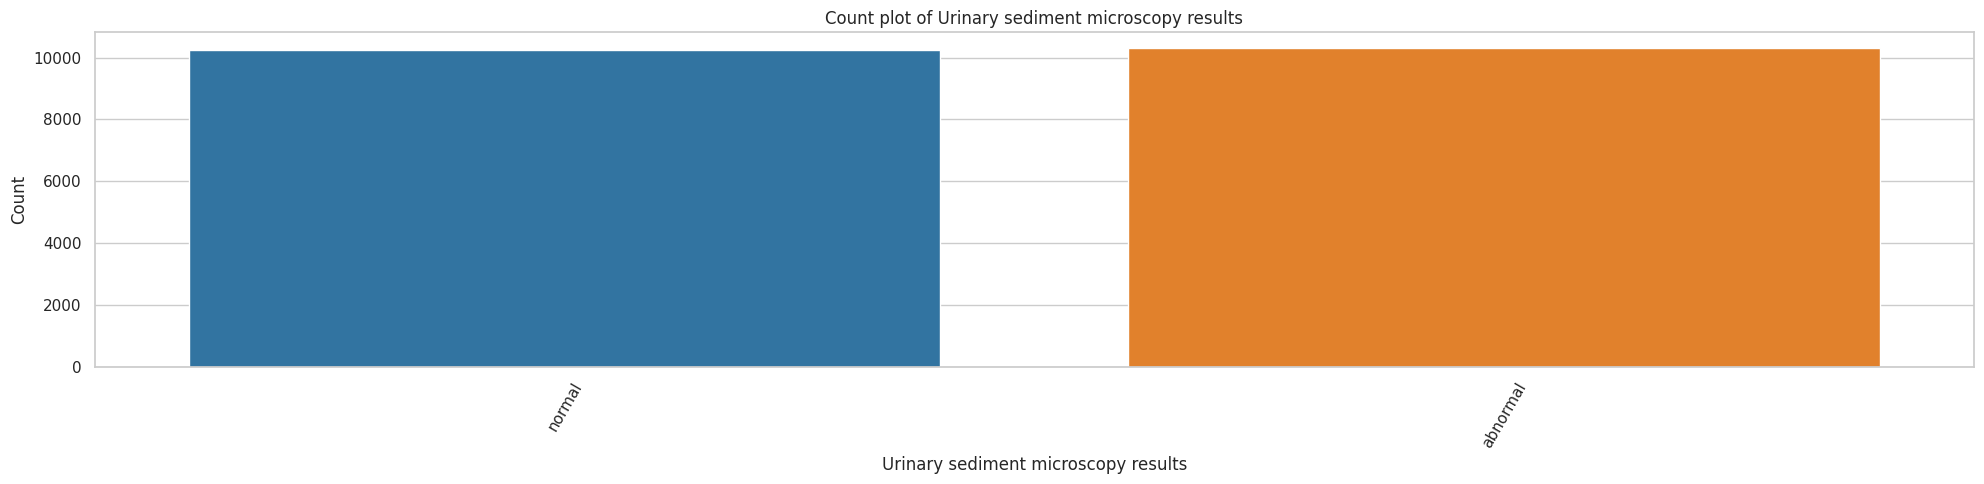

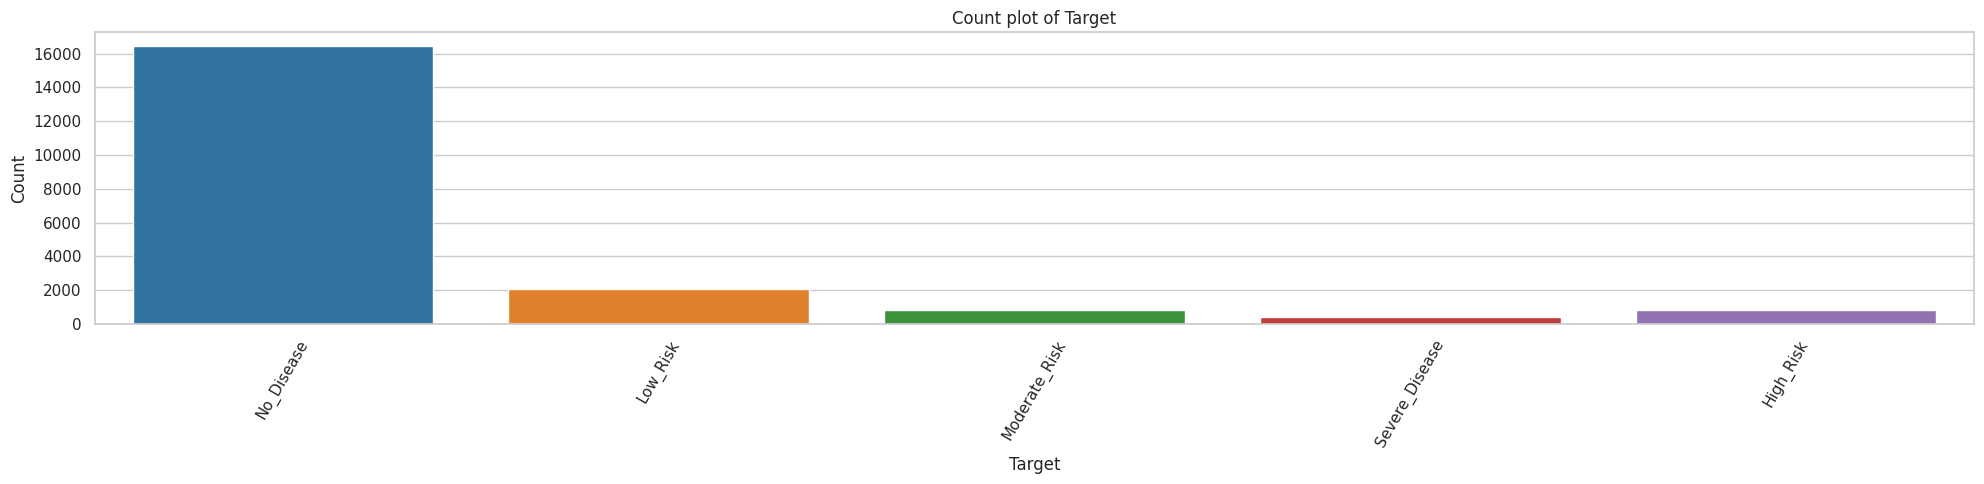

In [8]:
sns.set_style('whitegrid')
sns.set_context('notebook')
object_cols = df.select_dtypes(include='object').columns

for features in object_cols:
    plt.figure(figsize=(20, 5))
    sns.countplot(x=features, data=df)
    plt.title(f'Count plot of {features}')
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()

# Kde plot

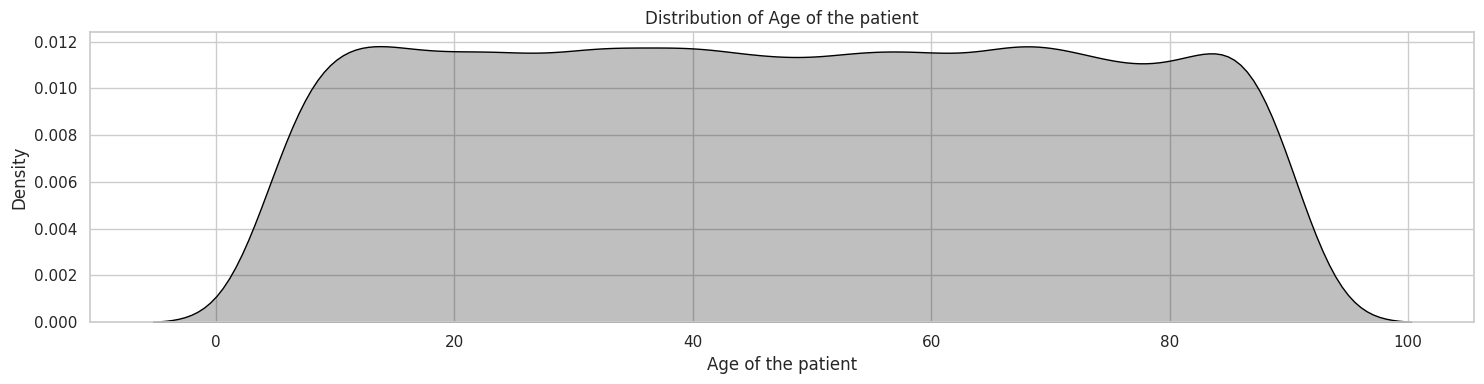

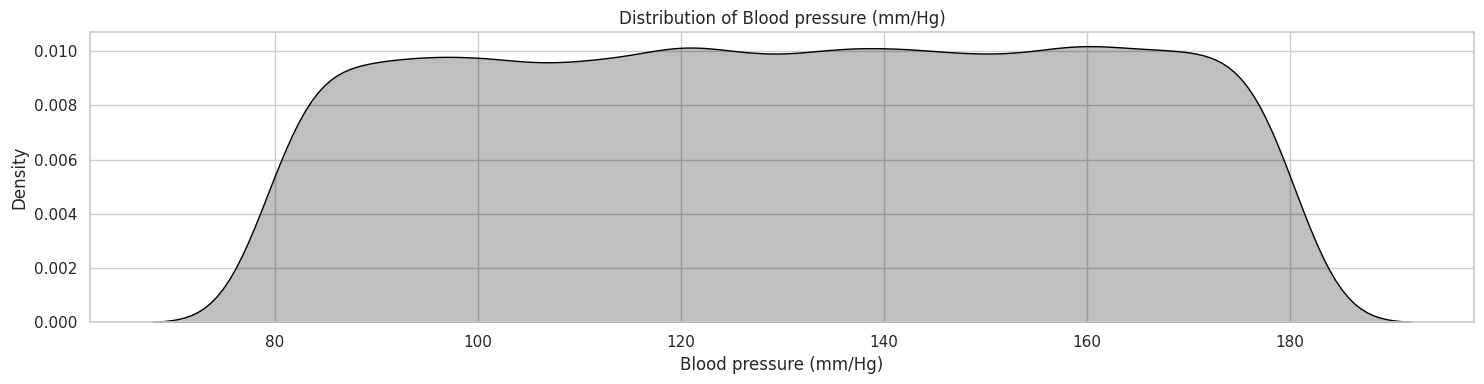

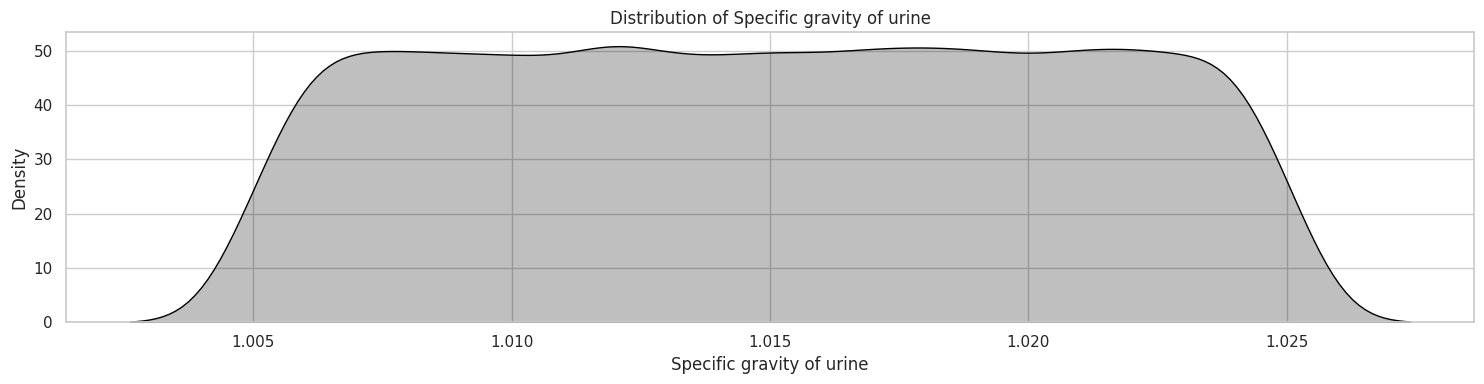

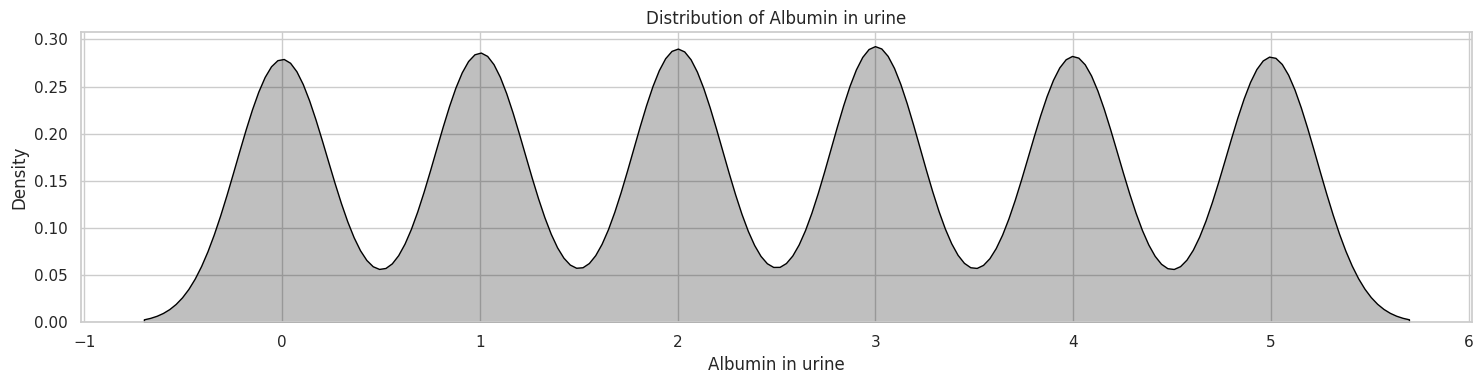

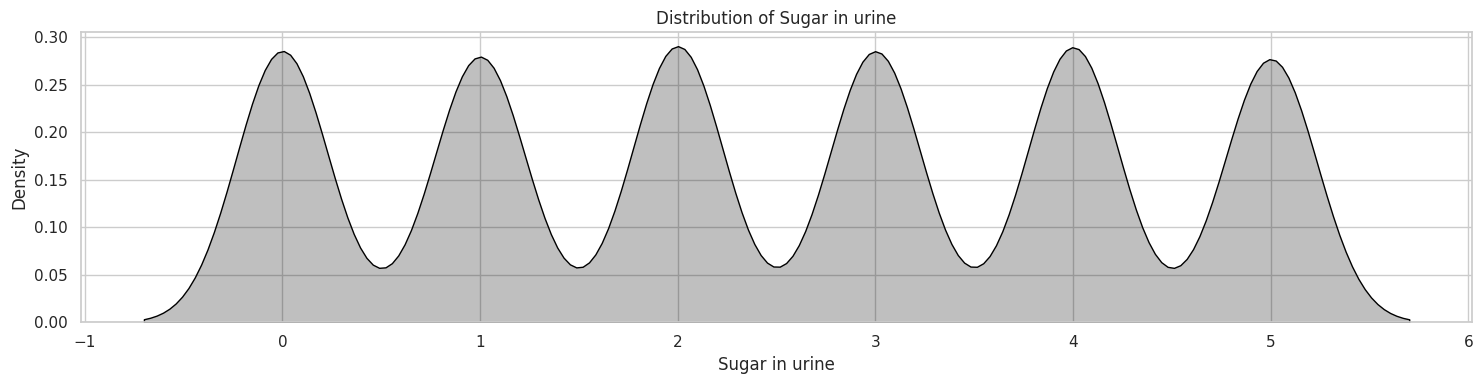

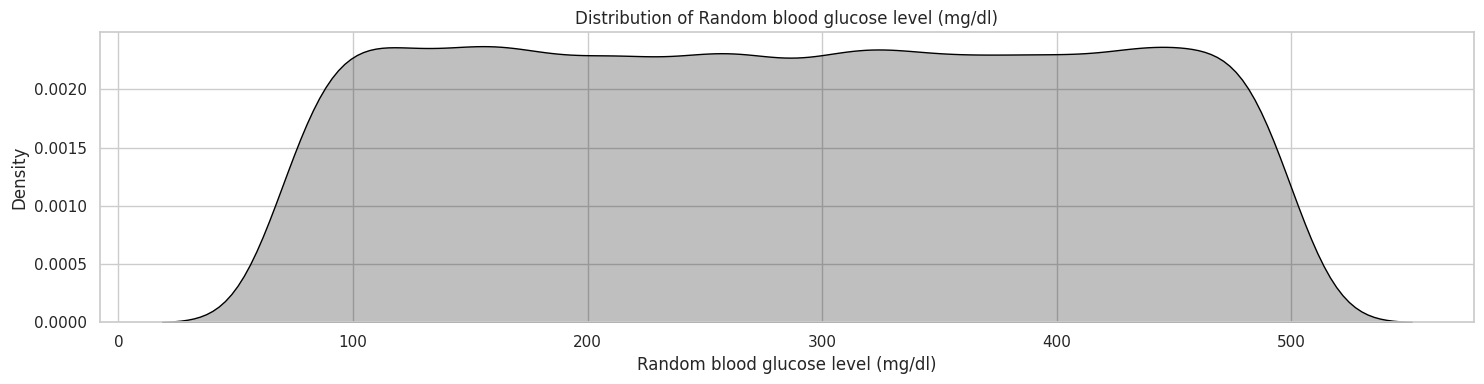

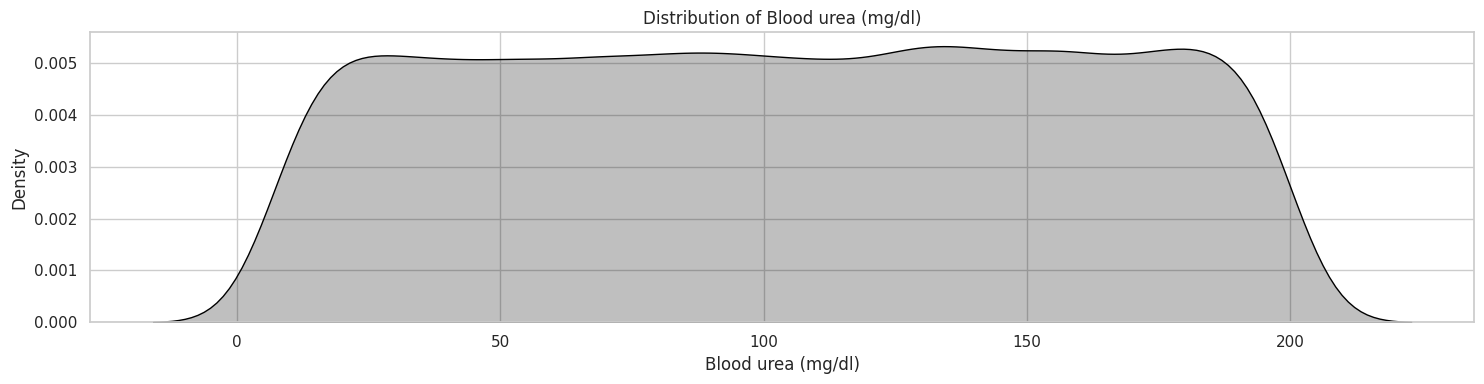

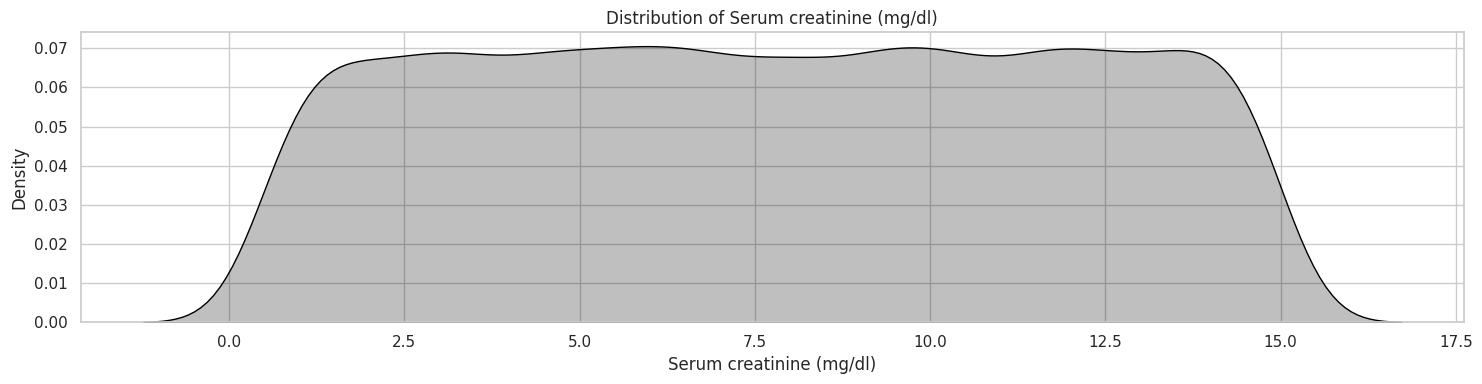

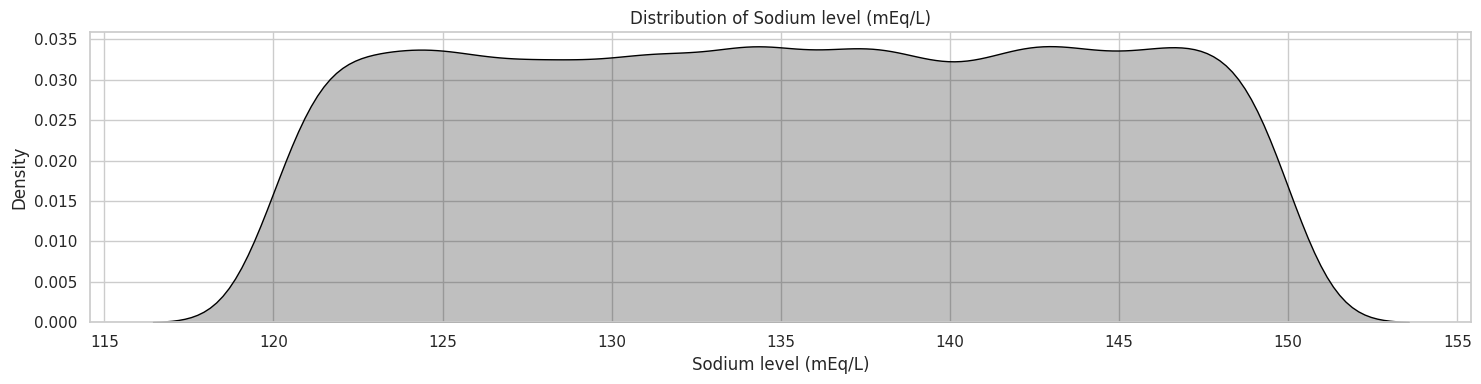

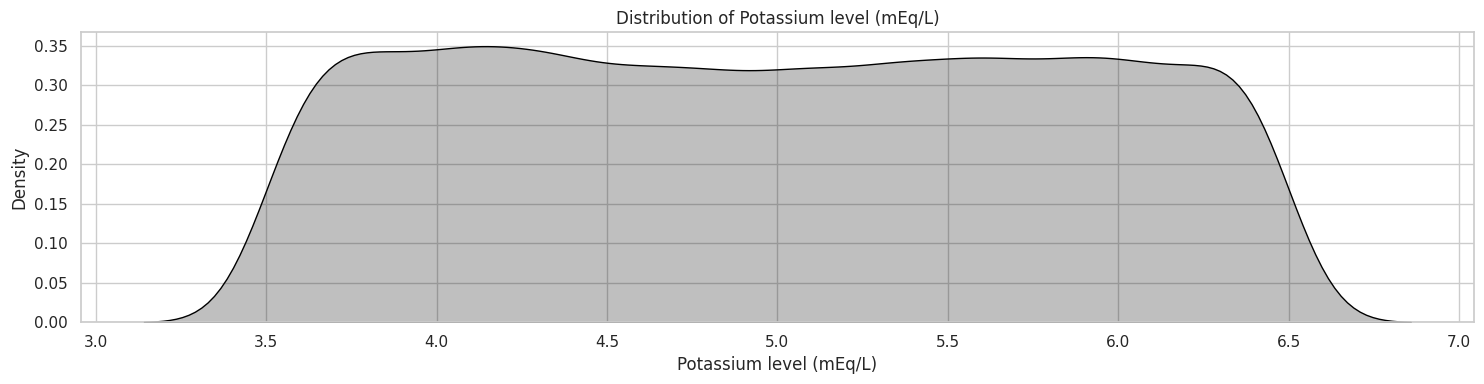

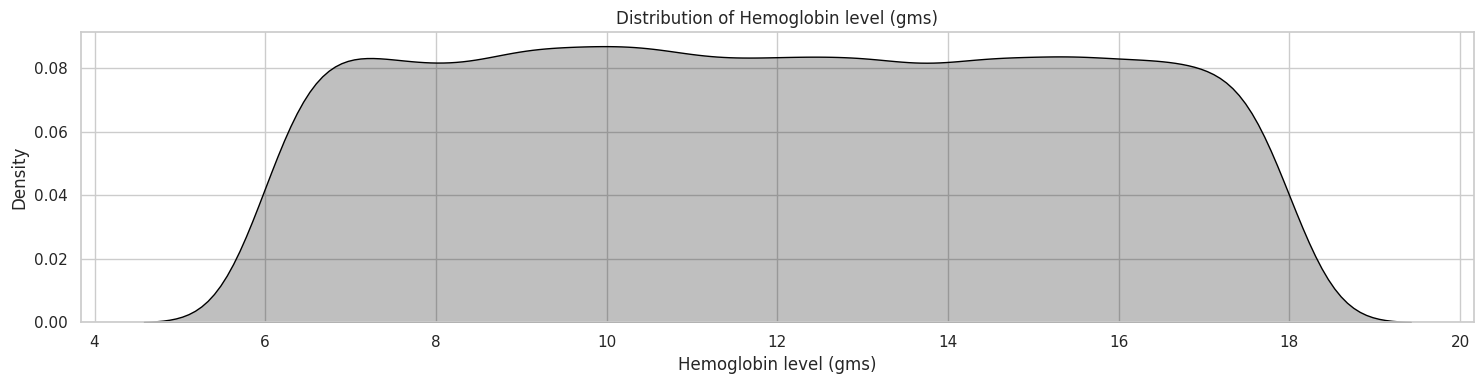

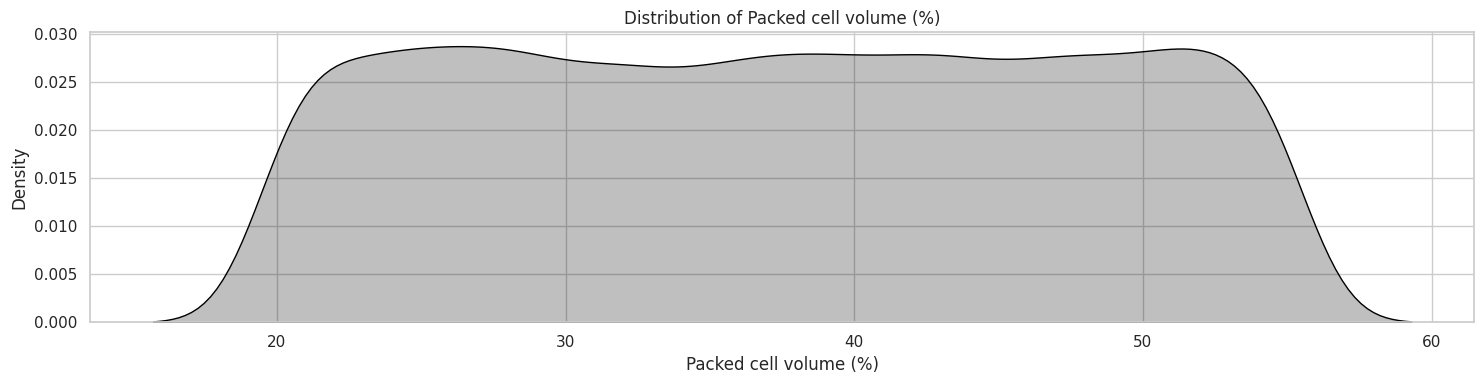

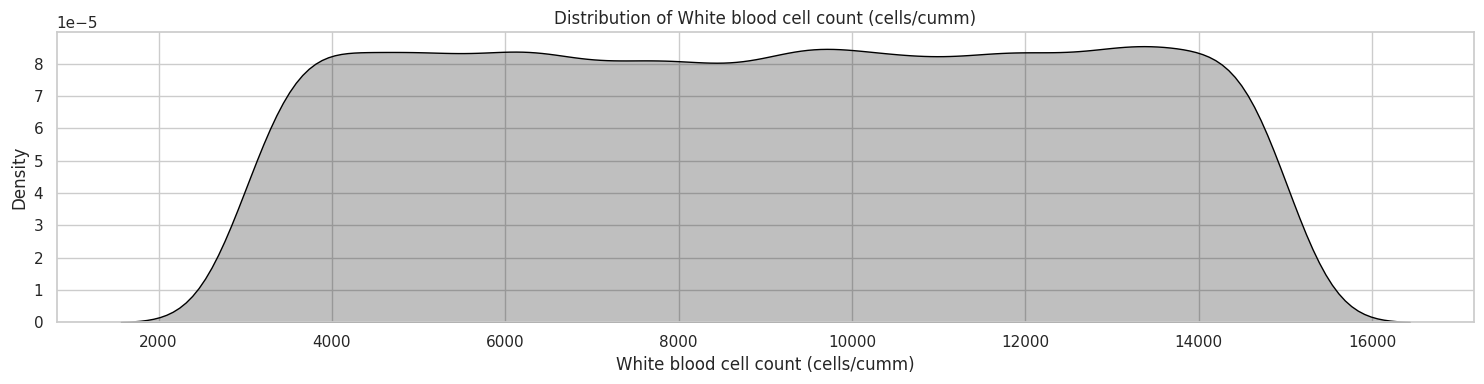

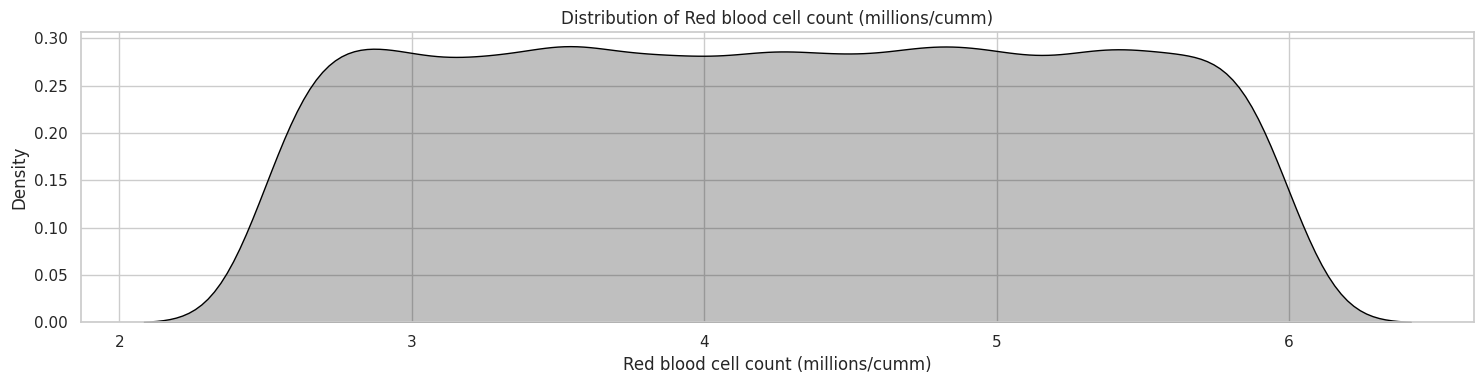

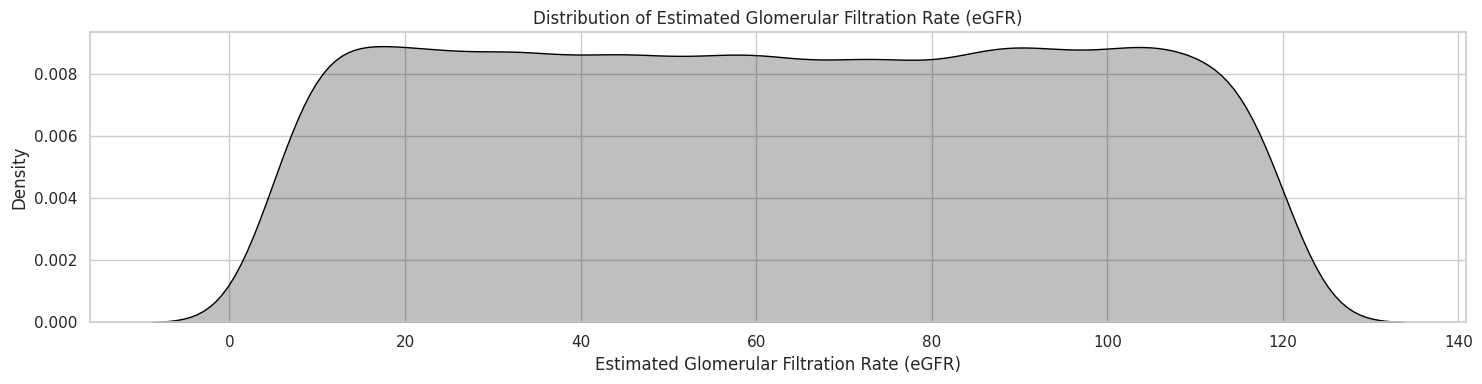

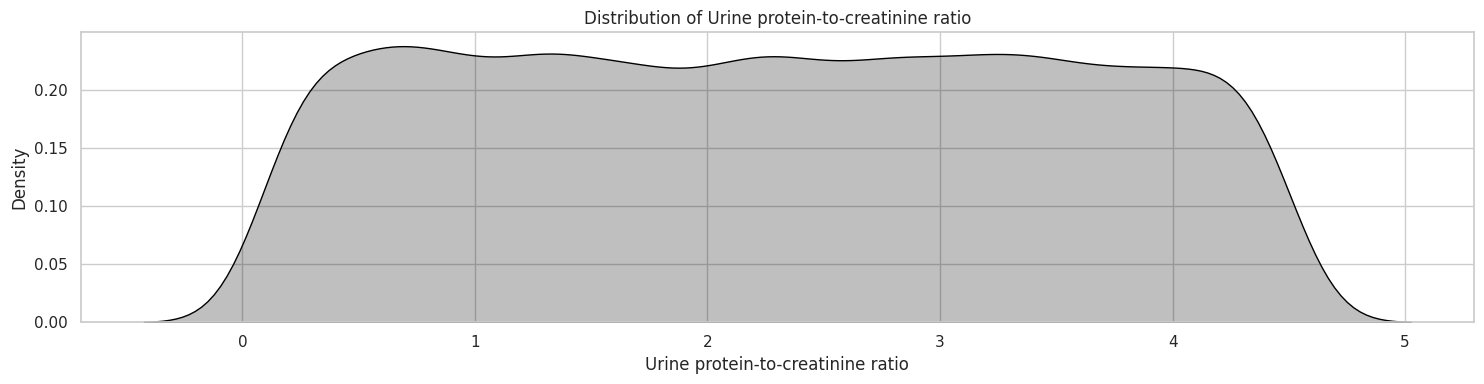

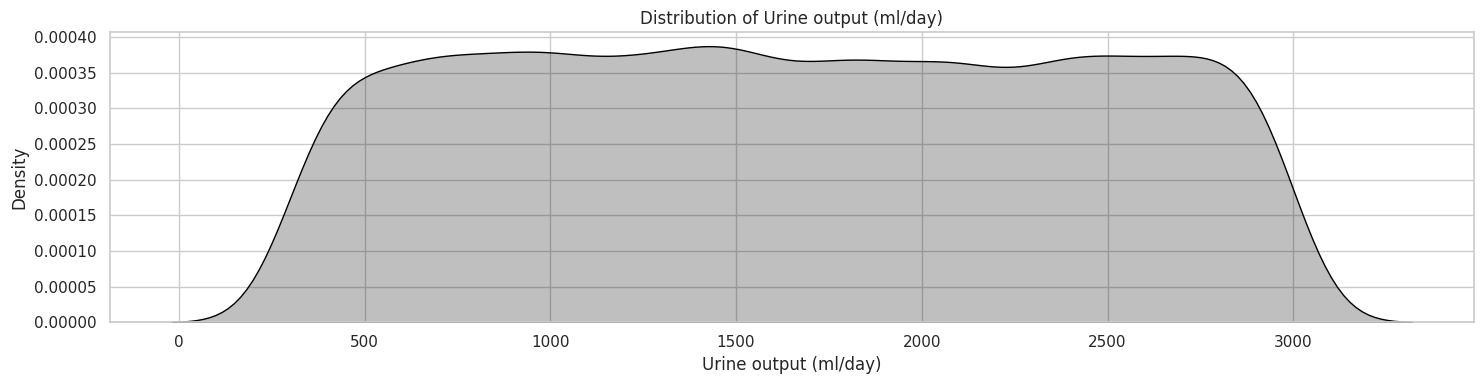

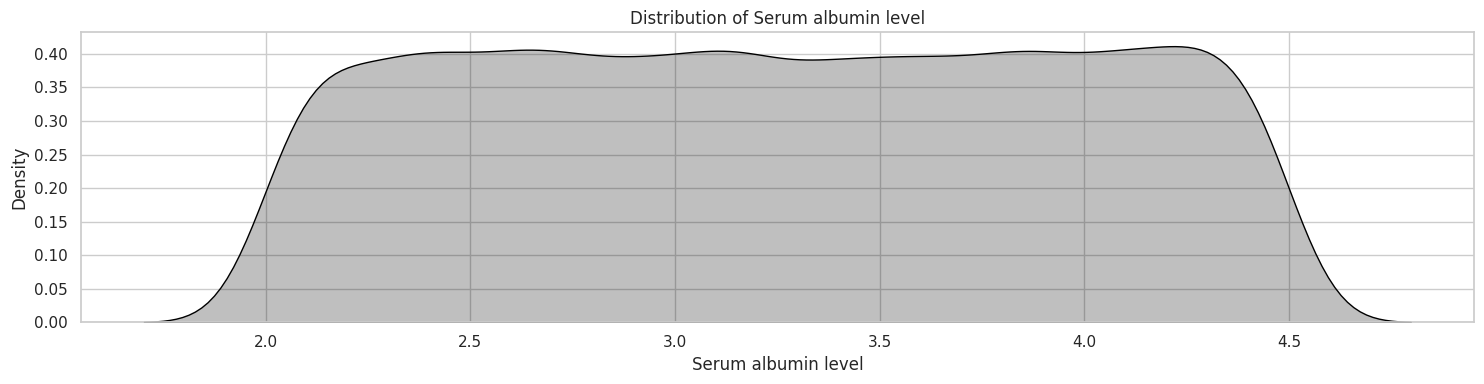

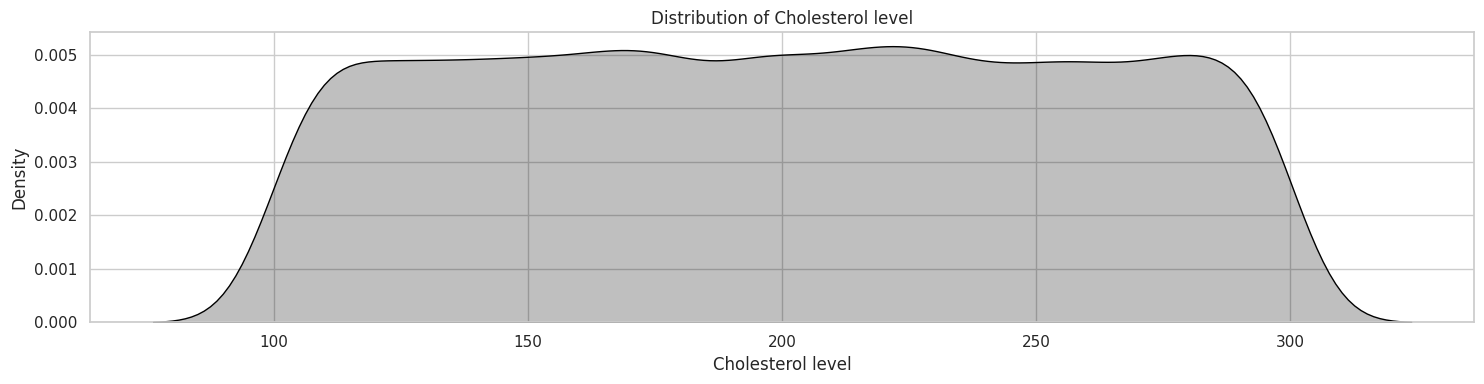

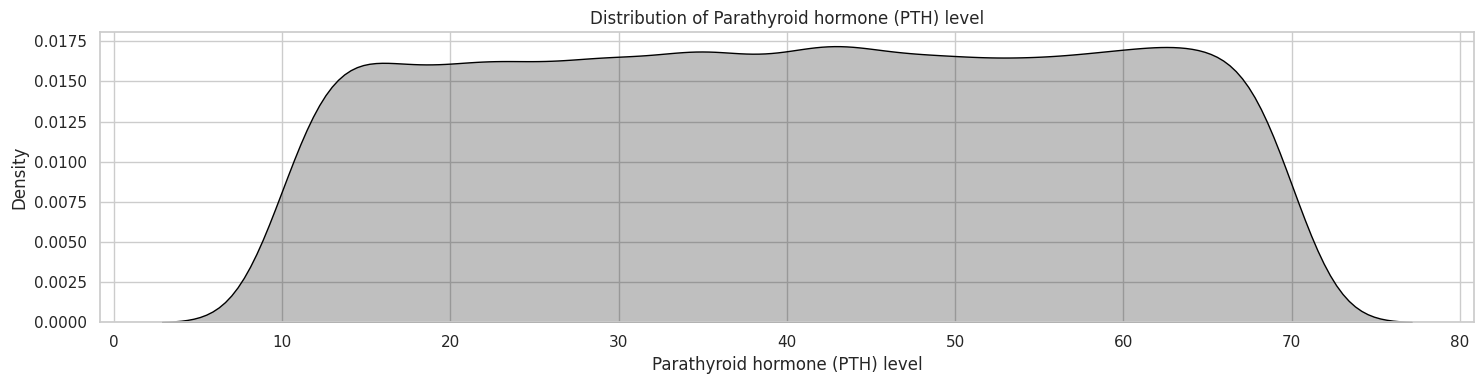

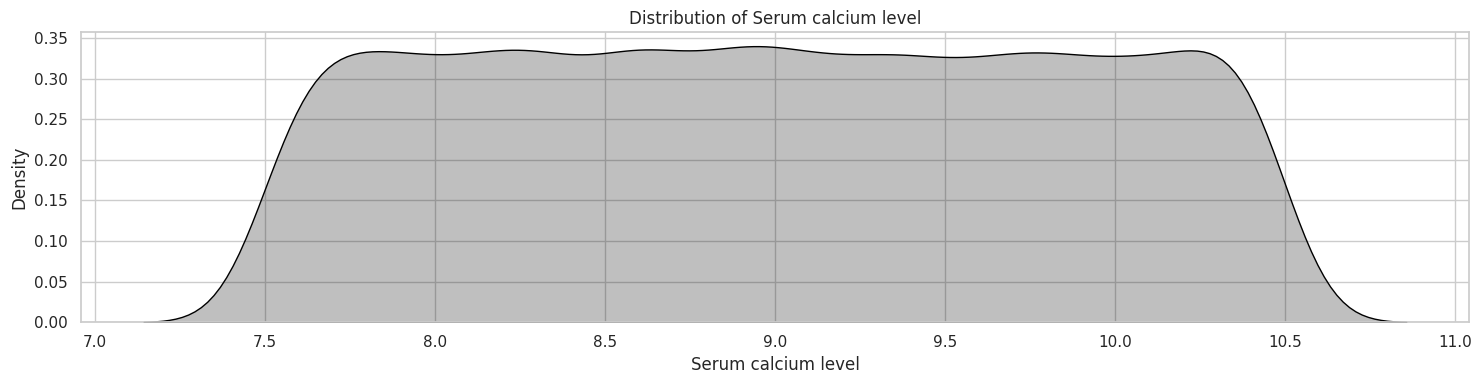

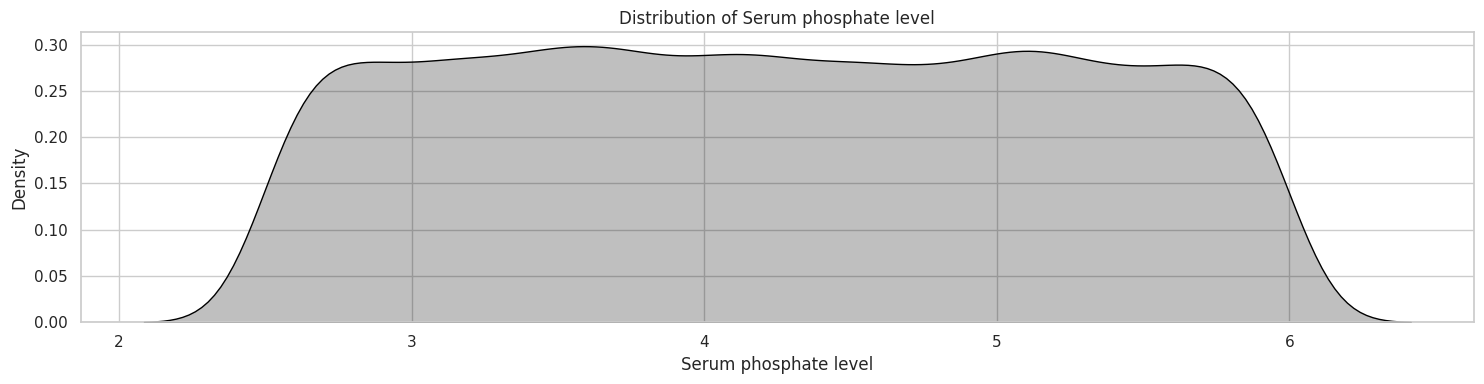

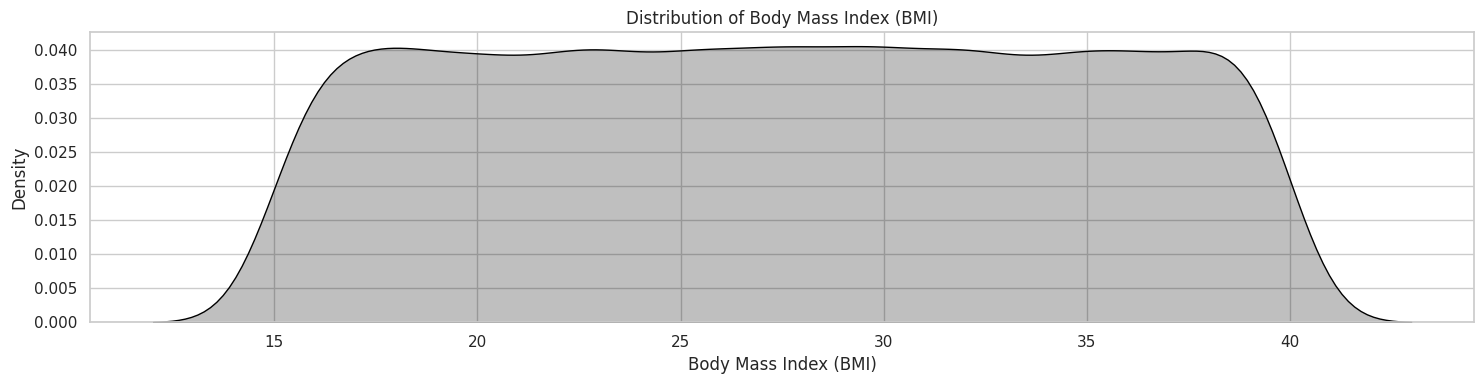

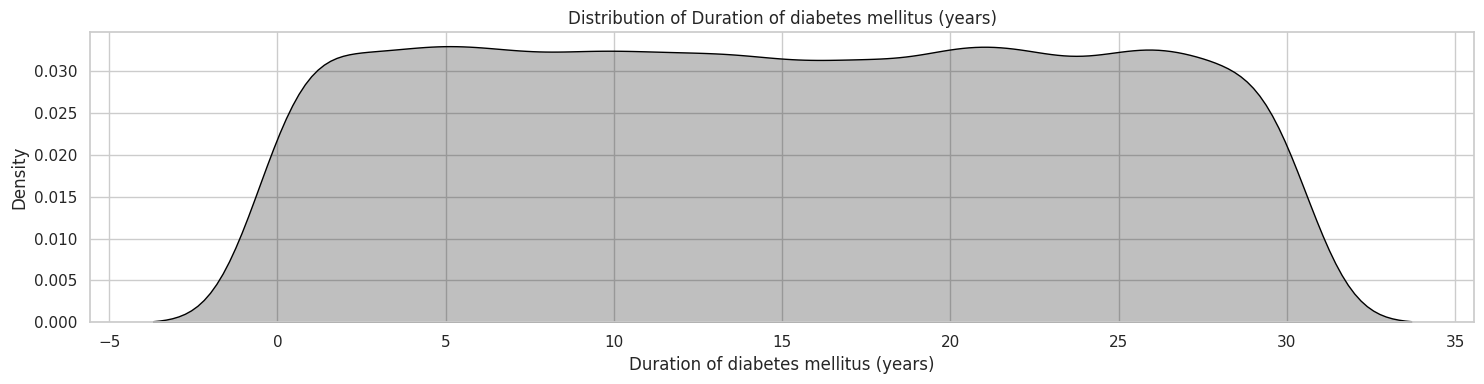

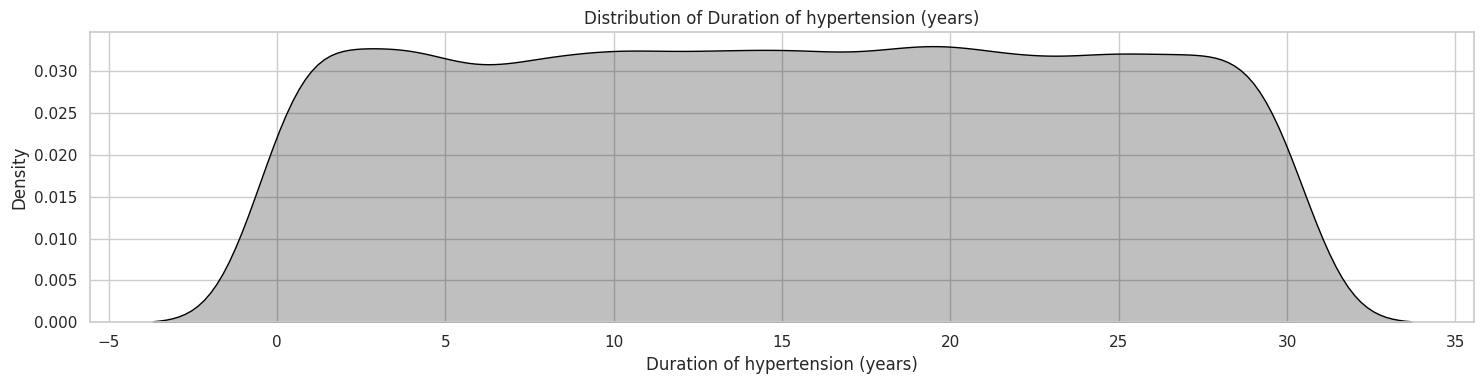

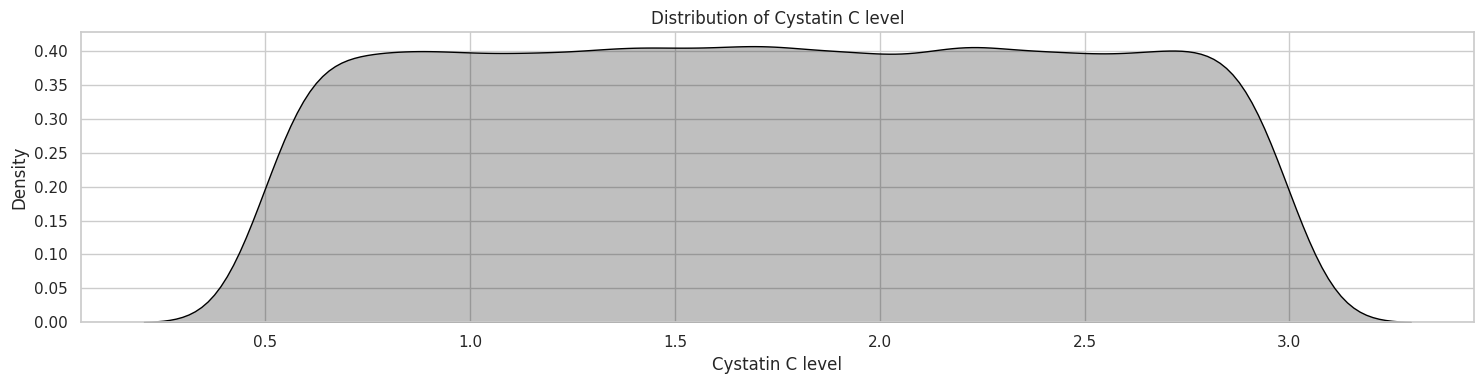

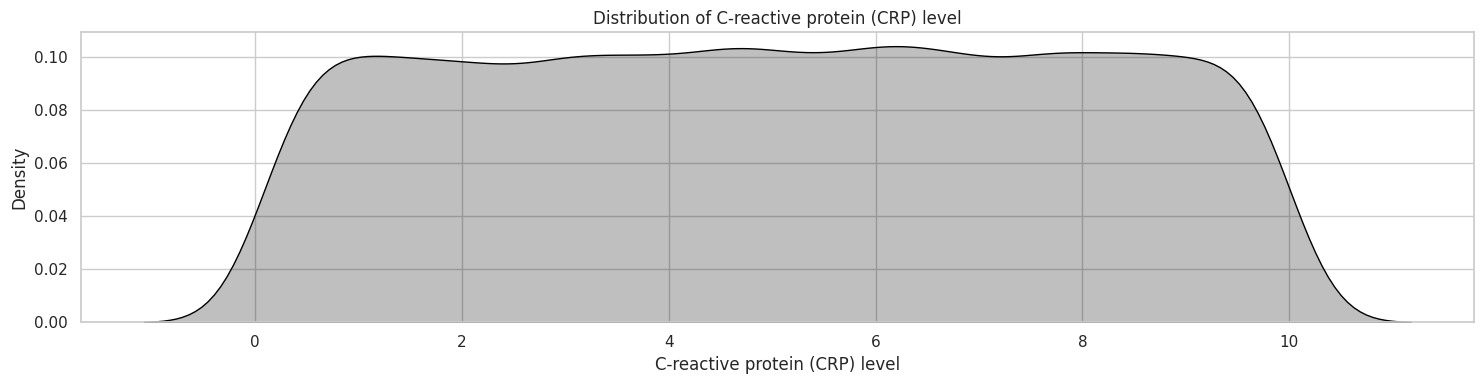

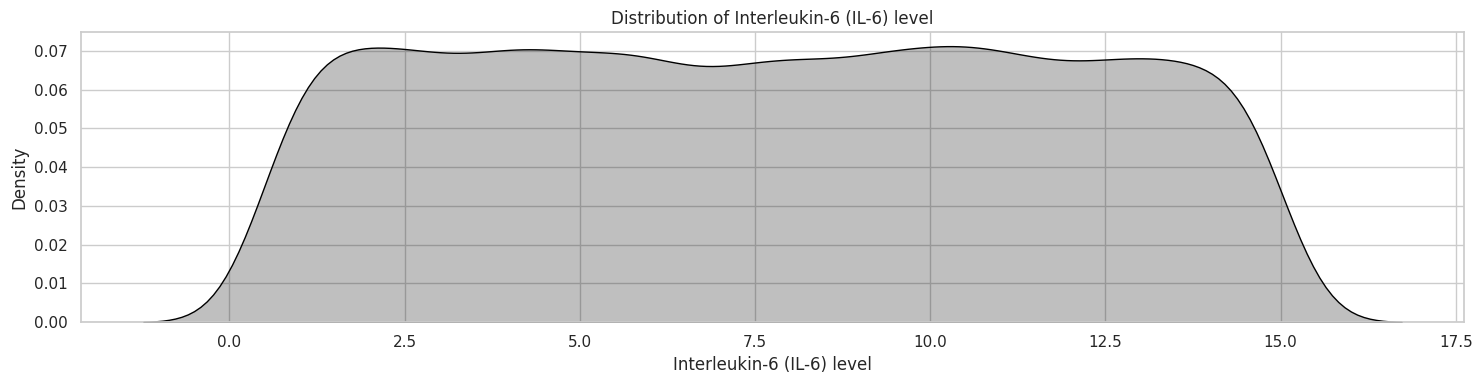

In [9]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Loop over numeric columns to plot KDE
for feature in num_cols:
    plt.figure(figsize=(15, 4))
    sns.kdeplot(df[feature].dropna(), color='black', fill=True)  # 'fill=True' gives better visuals
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# Correlation Matrix

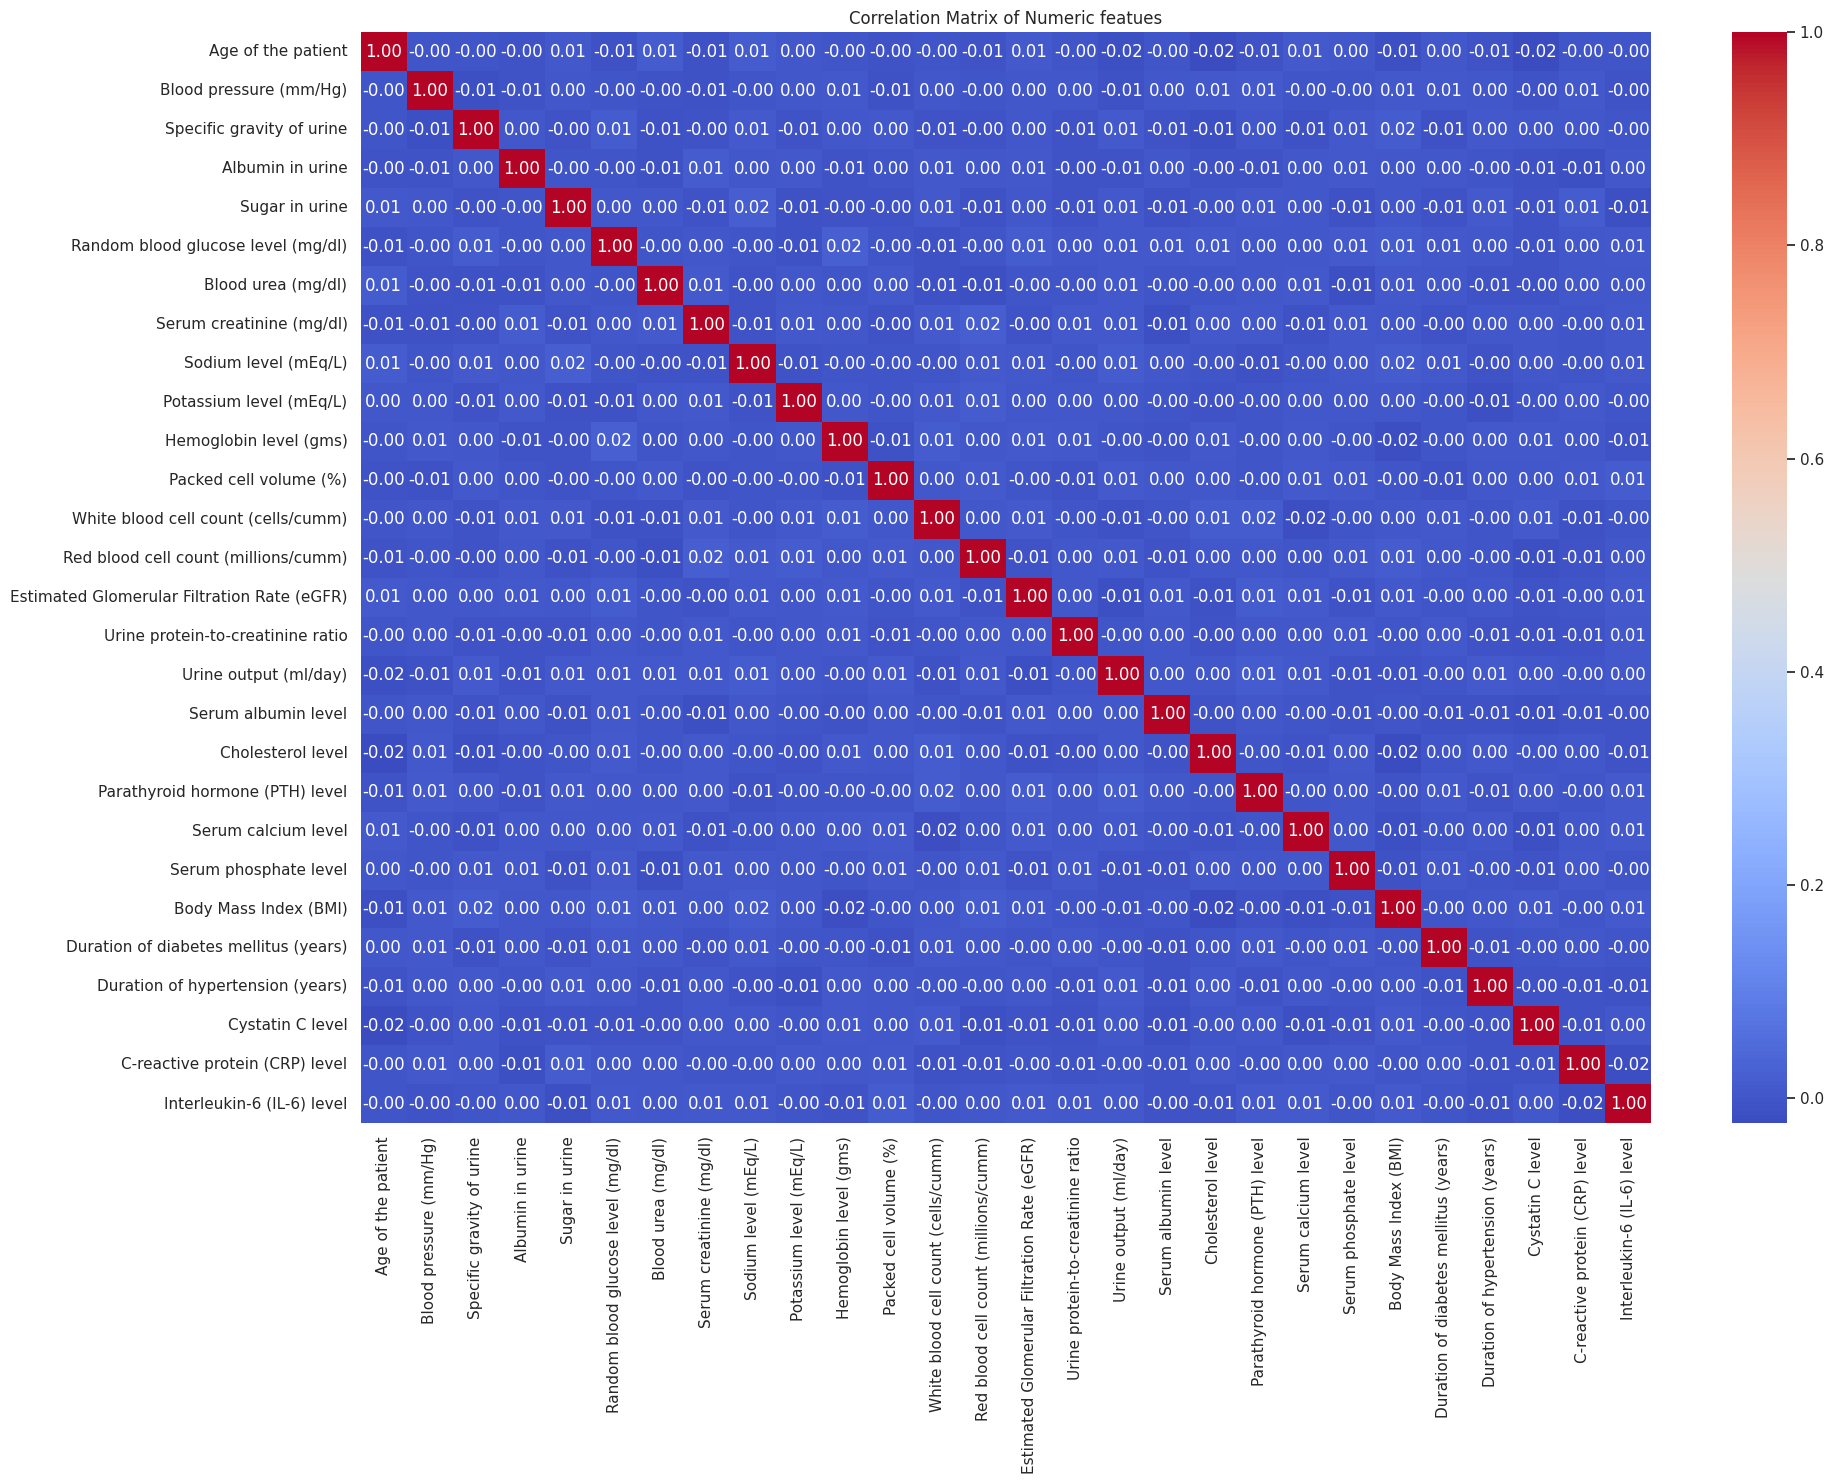

In [10]:
Numeric_df = df.select_dtypes(include=[np.number])
if Numeric_df.shape[1] >= 4:
    plt.figure(figsize=(20,15))
    correlation_matrix = Numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f'Correlation Matrix of Numeric featues')
    plt.tight_layout()
    plt.show()

# Feature Engineering

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
lab_col = df.select_dtypes(include='object').columns
for column in lab_col:
    df[column] = le.fit_transform(df[column])

# Correlation Matrix after Feature Engineering

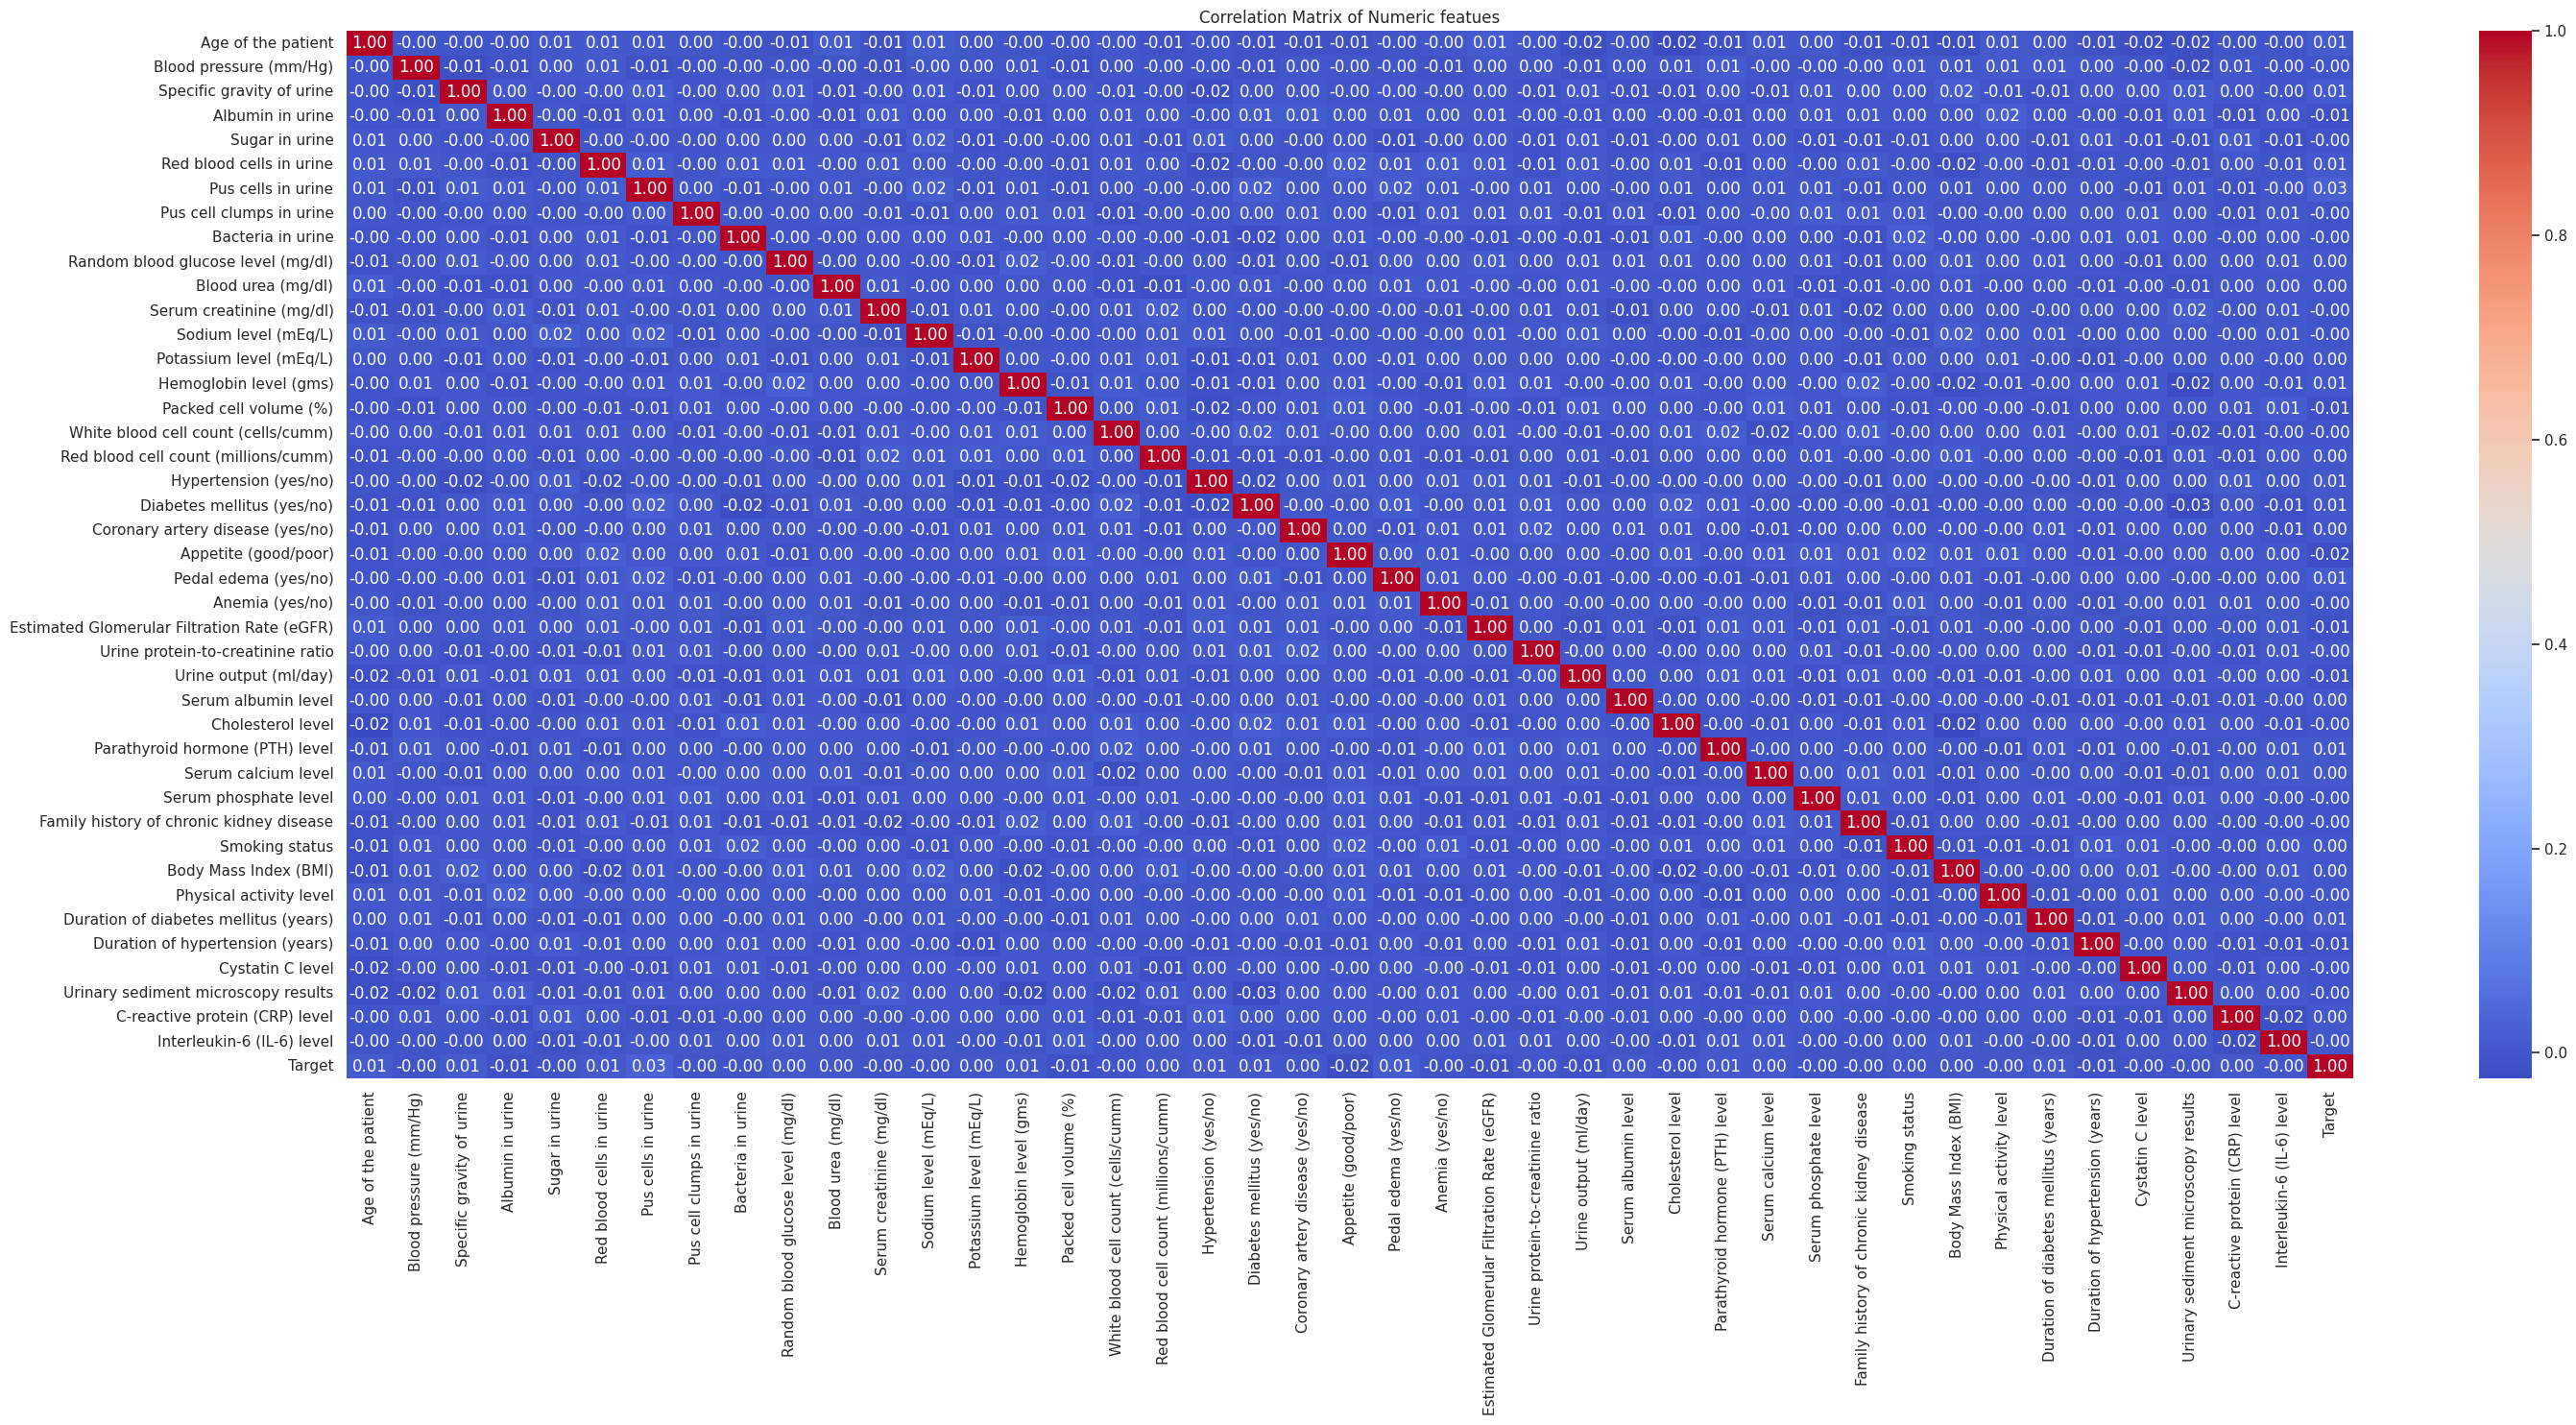

In [14]:
Numeric_df = df.select_dtypes(include=[np.number])
if Numeric_df.shape[1] >= 4:
    plt.figure(figsize=(30,15))
    correlation_matrix = Numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
    plt.title(f'Correlation Matrix of Numeric featues')
    plt.tight_layout()
    plt.show()

In [15]:
df

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,1,0,0,0,96,...,1,25.3,1,4,16,0.67,1,4.88,10.23,3
1,42,127,1.023,3,2,1,1,0,1,73,...,0,20.6,2,3,13,0.55,0,4.49,13.11,1
2,38,148,1.016,0,0,0,1,0,0,77,...,0,38.4,0,11,23,2.37,0,4.57,13.27,3
3,7,98,1.017,4,0,0,1,0,1,225,...,0,24.7,0,24,3,2.54,0,8.57,12.36,3
4,67,174,1.015,1,1,1,0,0,0,376,...,1,17.6,0,22,24,1.90,1,6.75,1.46,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20533,86,113,1.008,5,3,1,0,0,0,473,...,0,38.2,1,25,1,2.77,1,2.45,9.31,3
20534,47,80,1.016,3,4,1,0,0,0,477,...,0,26.8,2,3,7,1.81,1,4.19,3.45,3
20535,89,178,1.011,3,5,0,0,0,0,141,...,1,30.0,1,6,25,1.32,0,5.32,8.39,3
20536,86,138,1.009,1,5,0,1,0,1,110,...,1,28.9,1,0,21,2.52,0,0.61,9.53,3


# Model Section

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Nadam, Adadelta
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

2025-04-17 08:19:46.110560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744877986.354886      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744877986.422625      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
X = df.drop(columns= ['Target'])
y = df['Target']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# SCALEING

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

In [21]:
X_train_pca.shape[0] == y_train.shape[0]


True

In [22]:
X_test_pca.shape[0] == y_test.shape[0]


True

In [23]:
print("X_train_pca shape:", X_train_pca.shape)
print("y_train shape:", y_train.shape)
print("X_test_pca shape:", X_test_pca.shape)
print("y_test shape:", y_test.shape)


X_train_pca shape: (16430, 40)
y_train shape: (16430,)
X_test_pca shape: (4108, 40)
y_test shape: (4108,)


In [24]:
num_classes = len(np.unique(y_train))  # e.g., 3 for 3 classes

# Build ANN
model = Sequential()
model.add(Dense(128, input_shape=(X_train_pca.shape[1],), activation='tanh'))
model.add(Dense(64, input_shape=(X_train_pca.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))  # for multi-class

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
# Managing the learning rate Automatically.
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)
model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test), callbacks=[lr_scheduler])


Epoch 1/50


2025-04-17 08:20:02.766564: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


514/514 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7573 - loss: 0.8636 - val_accuracy: 0.8023 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 2/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.7497 - val_accuracy: 0.8023 - val_loss: 0.7407 - learning_rate: 0.0010
Epoch 3/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8047 - loss: 0.7237 - val_accuracy: 0.8023 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 4/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.7225 - val_accuracy: 0.8023 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 5/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7998 - loss: 0.7233 - val_accuracy: 0.8023 - val_loss: 0.7437 - learning_rate: 0.0010
Epoch 6/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.7204 - val_accuracy: 0.8023 - val_loss: 0.7441 - learning_rate: 0.0010
Epoch 7/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.7119 - val_accurac

In [25]:
# Predictions
y_pred_probs = model.predict(X_test_pca)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy Score: 0.8018500486854917

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.25      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.80      1.00      0.89      3296
           4       0.00      0.00      0.00        73

    accuracy                           0.80      4108
   macro avg       0.21      0.20      0.18      4108
weighted avg       0.67      0.80      0.71      4108



In [26]:
y_pred_probs = model.predict(X_test_pca)

y_pred_labels = np.argmax(y_pred_probs, axis=1)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Precision (macro):", precision_score(y_test, y_pred_labels, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_labels, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_labels, average='macro'))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

Accuracy: 0.8018500486854917
Precision (macro): 0.21047758284600393
Recall (macro): 0.20029873039581778
F1 Score (macro): 0.17895238095238095

Confusion Matrix:
 [[   0    0    0  168    0]
 [   0    1    0  415    0]
 [   0    0    0  155    0]
 [   0    3    0 3293    0]
 [   0    0    0   73    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.25      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.80      1.00      0.89      3296
           4       0.00      0.00      0.00        73

    accuracy                           0.80      4108
   macro avg       0.21      0.20      0.18      4108
weighted avg       0.67      0.80      0.71      4108



# CONCLUSION:
> The accuarcy score is around `~80%` and for better reuslts need to better Feature Engineering.
>
> Cross-val giving `~78%`